Enter the number of nodes: 100


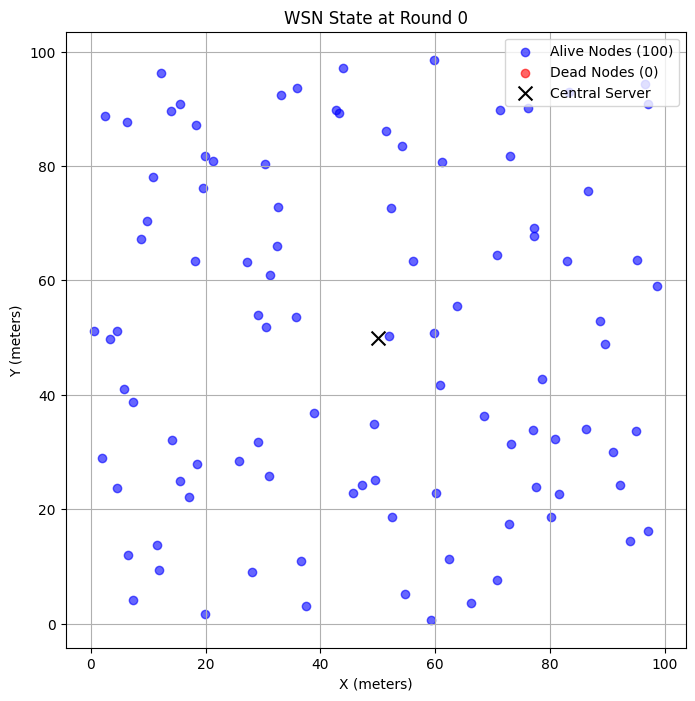

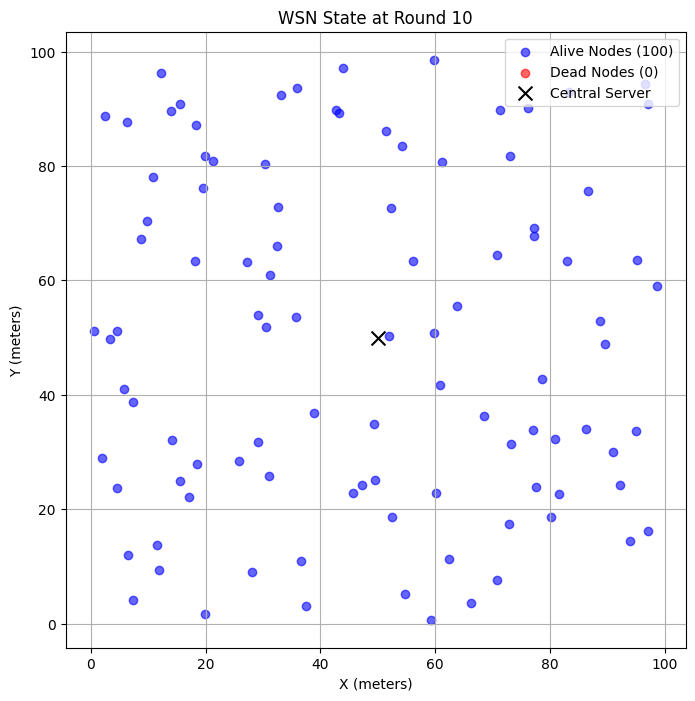

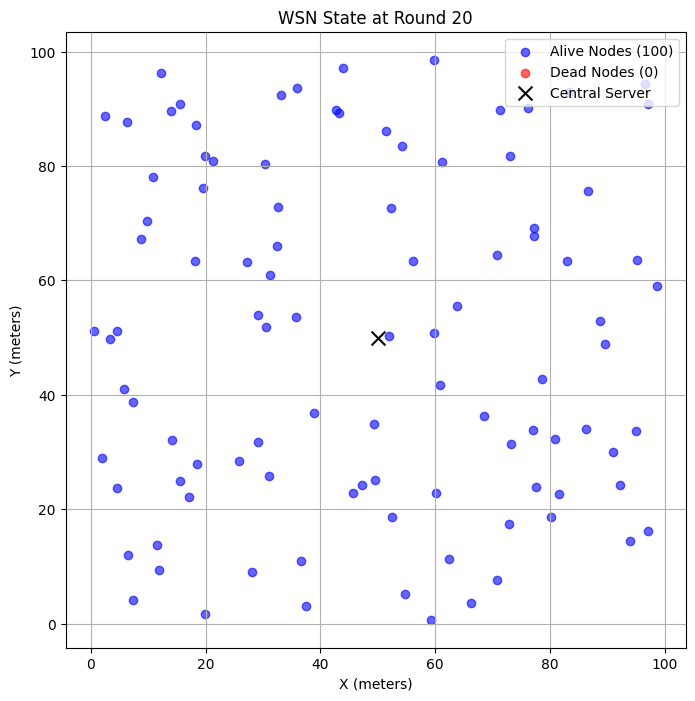

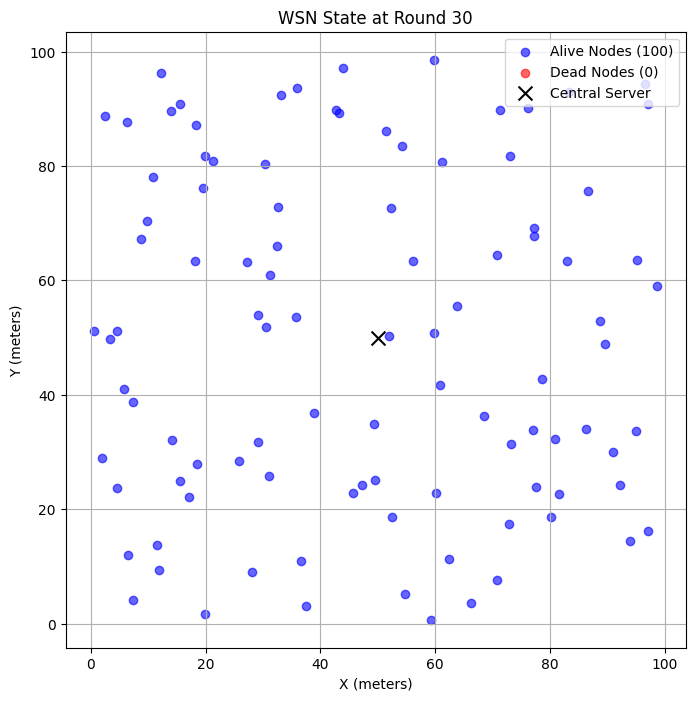

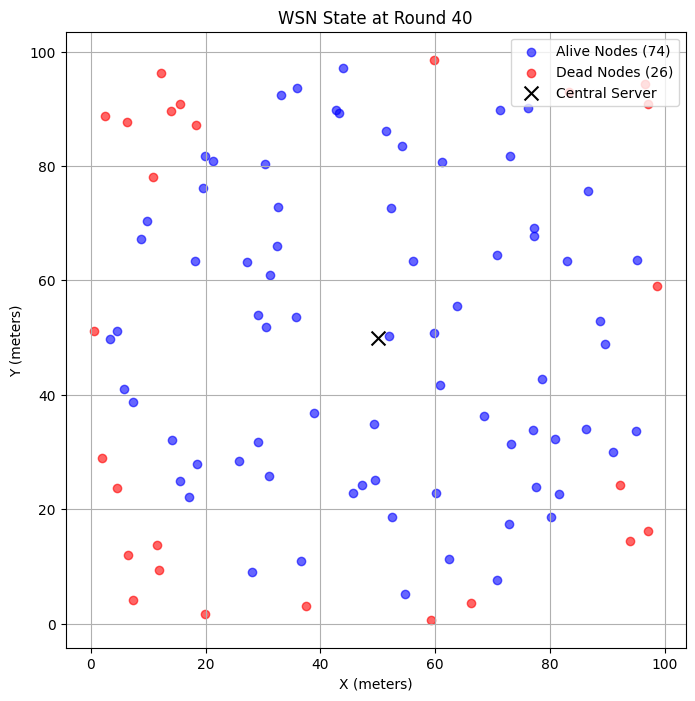

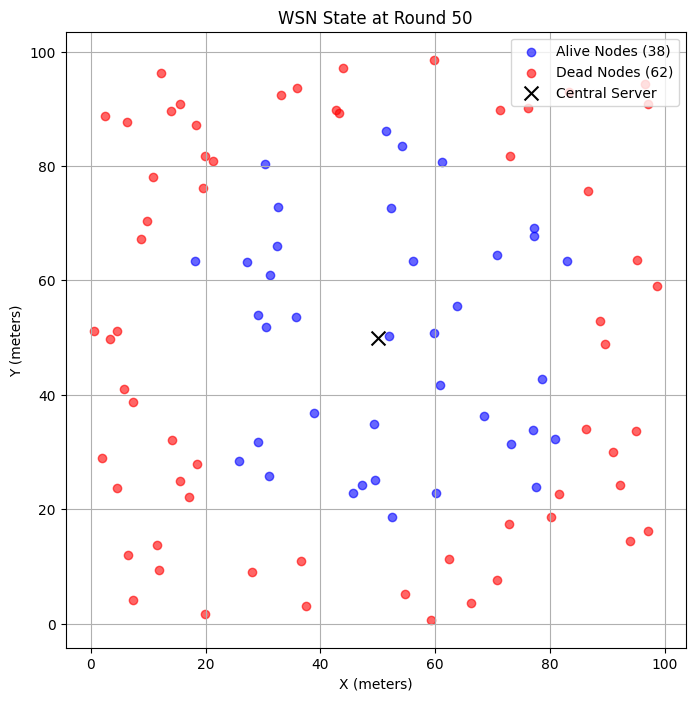

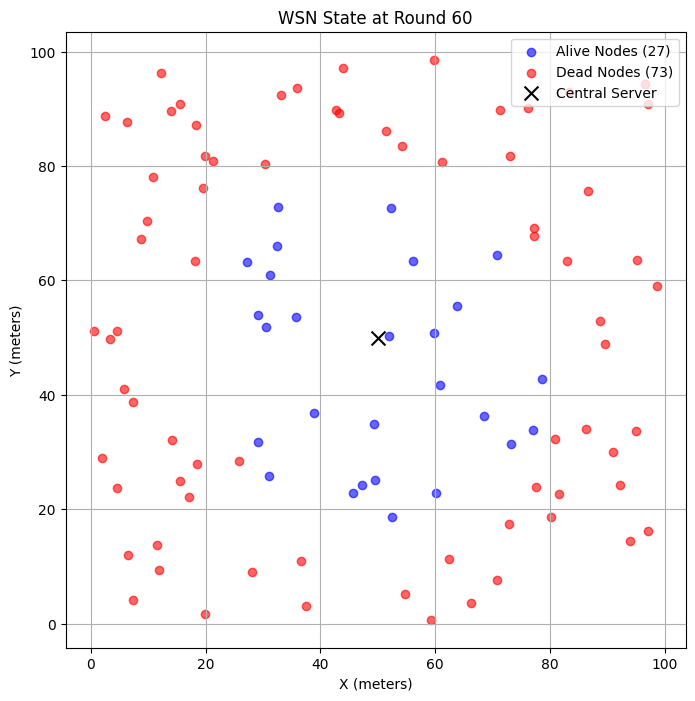

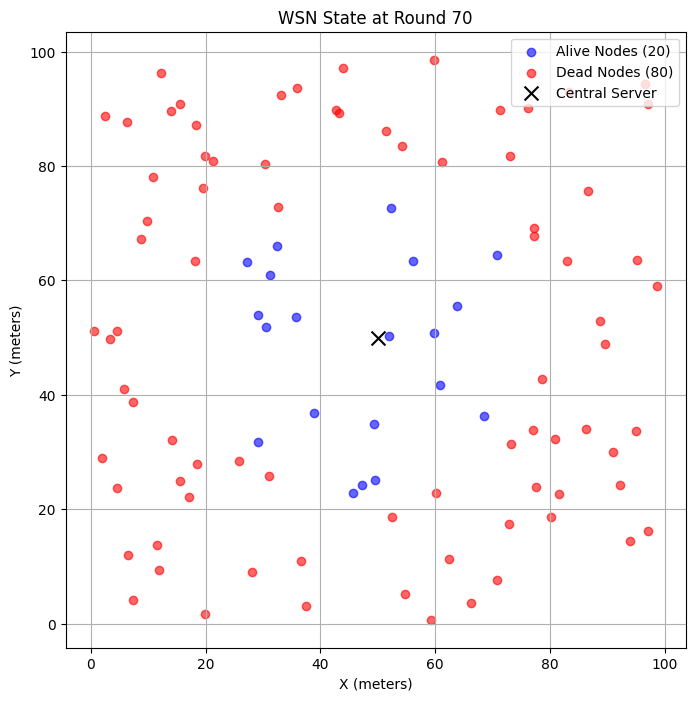

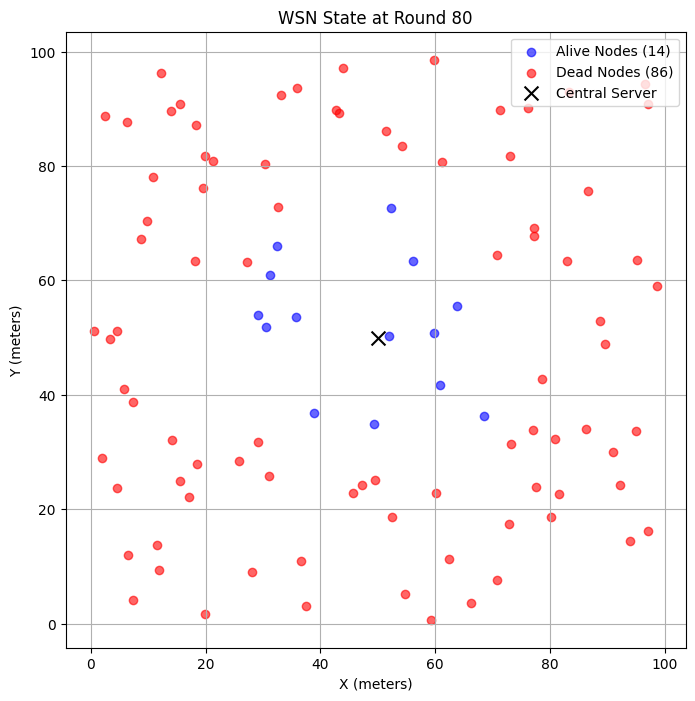

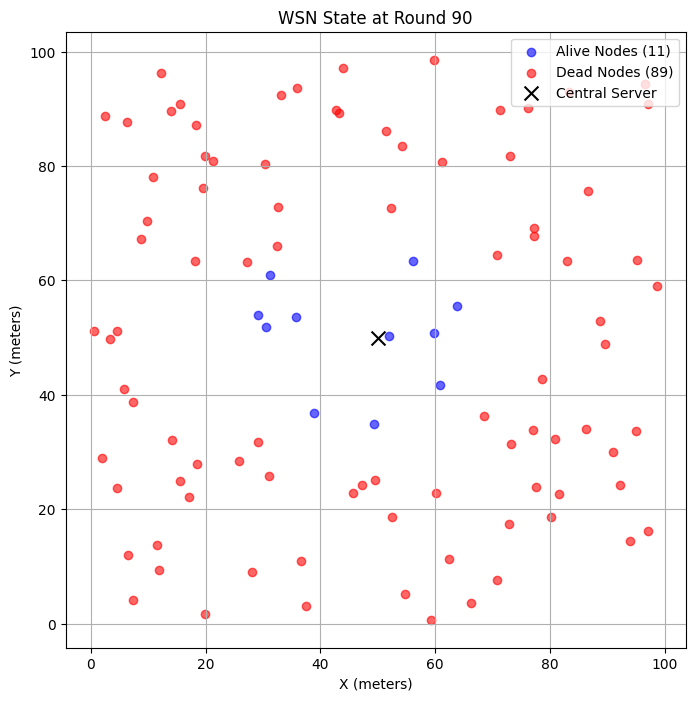

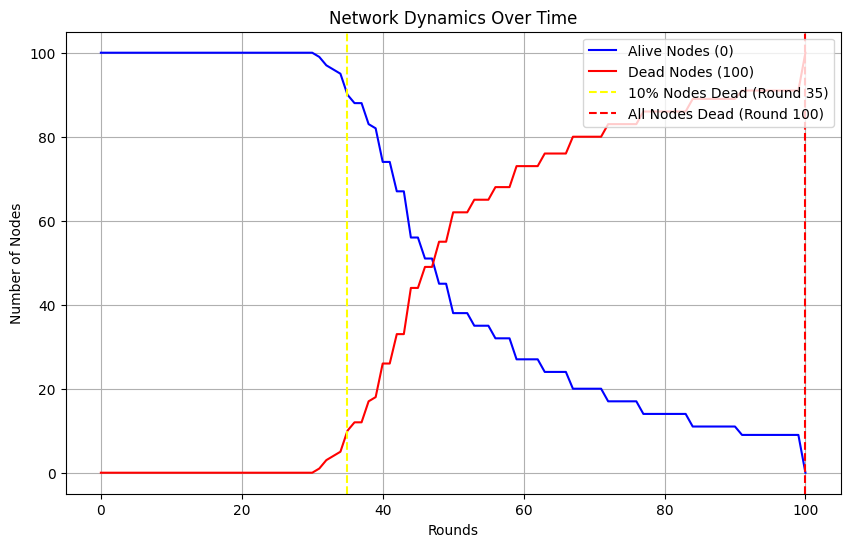

Network lifetime (10% nodes dead) is at round: 35
All nodes are dead at round: 100


In [ ]:
#1
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = int(input("Enter the number of nodes: "))  # Number of nodes
Eo = 1000  # Initial energy (arbitrary units for easier visualization)
do = 20  # Optimal distance threshold
field_size = n  # Field size is set to N x N where N = number of nodes
server_x, server_y = field_size / 2, field_size / 2  # Central server position

# Deploy nodes
np.random.seed(42)
x_coords = np.random.uniform(0, field_size, n)
y_coords = np.random.uniform(0, field_size, n)
energies = np.full(n, Eo)  # Initial energy of nodes

# Visualization function
def plot_network(round_num, alive, dead):
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords[alive], y_coords[alive], c='blue', label=f'Alive Nodes ({len(alive)})', alpha=0.6)
    plt.scatter(x_coords[dead], y_coords[dead], c='red', label=f'Dead Nodes ({len(dead)})', alpha=0.6)
    plt.scatter(server_x, server_y, c='black', marker='x', s=100, label='Central Server')
    plt.title(f"WSN State at Round {round_num}")
    plt.xlabel("X (meters)")
    plt.ylabel("Y (meters)")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

# Main simulation loop
alive_nodes = []
dead_nodes = []
network_lifetime = -1  # Round when 10% nodes are dead
all_nodes_dead = -1  # Round when all nodes are dead
round_num = 0

while True:
    # Determine alive and dead nodes
    alive = np.where(energies > 0)[0]
    dead = np.where(energies <= 0)[0]
    alive_nodes.append(len(alive))
    dead_nodes.append(len(dead))

    # Check for network lifetime (10% nodes dead)
    if network_lifetime == -1 and len(dead) >= 0.1 * n:
        network_lifetime = round_num

    # Check for all nodes dead
    if all_nodes_dead == -1 and len(dead) == n:
        all_nodes_dead = round_num
        break  # End the simulation as all nodes are dead

    # Energy dissipation for nodes directly transmitting to the base station
    for i in alive:
        distance_to_server = np.sqrt((x_coords[i] - server_x) ** 2 + (y_coords[i] - server_y) ** 2)
        if distance_to_server > do:
            energies[i] -= 10 * (distance_to_server / do)
        else:
            energies[i] -= 10  # Default dissipation if within range

    # Visualize network state at certain rounds
    if round_num % 10 == 0:
        plot_network(round_num, alive, dead)

    round_num += 1  # Increment the round counter

# Plot network statistics
plt.figure(figsize=(10, 6))
plt.plot(range(len(alive_nodes)), alive_nodes, label=f"Alive Nodes ({alive_nodes[-1]})", color="blue")
plt.plot(range(len(dead_nodes)), dead_nodes, label=f"Dead Nodes ({dead_nodes[-1]})", color="red")

# Add vertical lines for milestones
if network_lifetime != -1:
    plt.axvline(x=network_lifetime, color='yellow', linestyle='--', label=f"10% Nodes Dead (Round {network_lifetime})")
if all_nodes_dead != -1:
    plt.axvline(x=all_nodes_dead, color='red', linestyle='--', label=f"All Nodes Dead (Round {all_nodes_dead})")

plt.title("Network Dynamics Over Time")
plt.xlabel("Rounds")
plt.ylabel("Number of Nodes")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# Print network milestones
if network_lifetime != -1:
    print(f"Network lifetime (10% nodes dead) is at round: {network_lifetime}")
print(f"All nodes are dead at round: {all_nodes_dead}")


Enter the number of nodes: 100


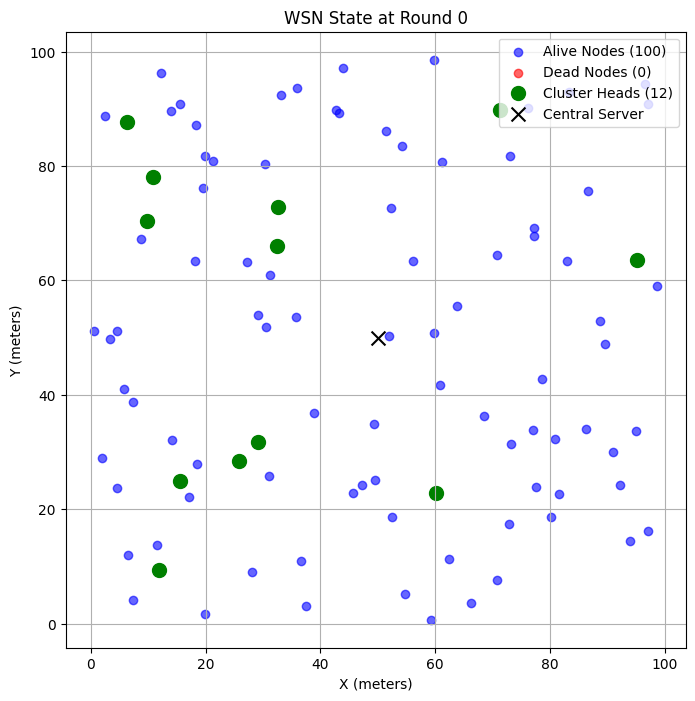

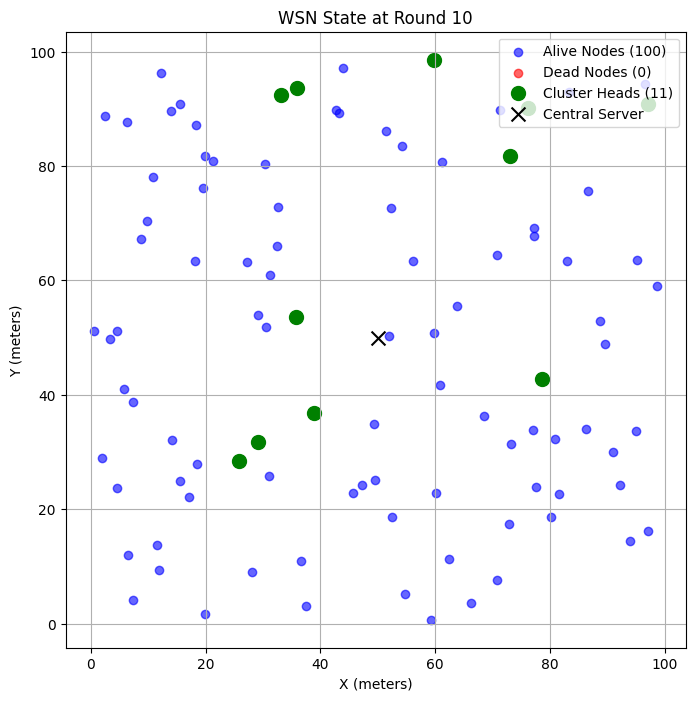

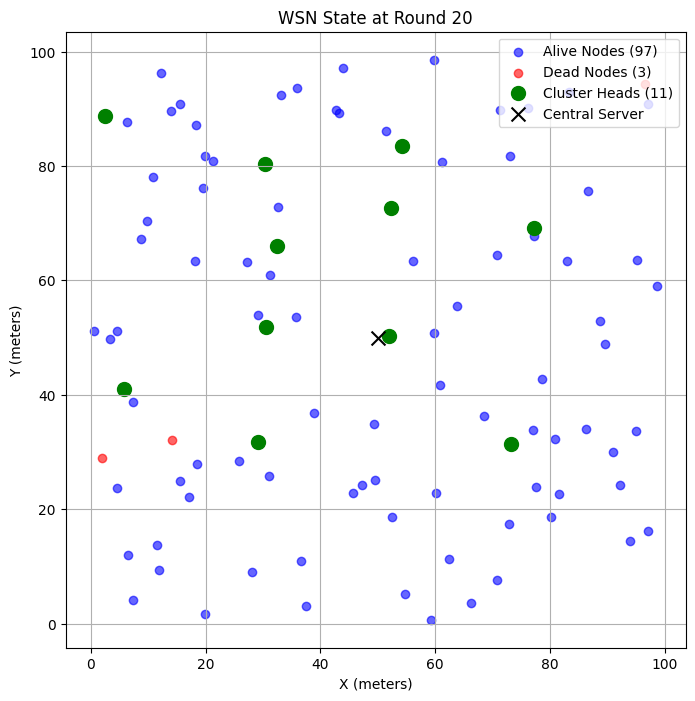

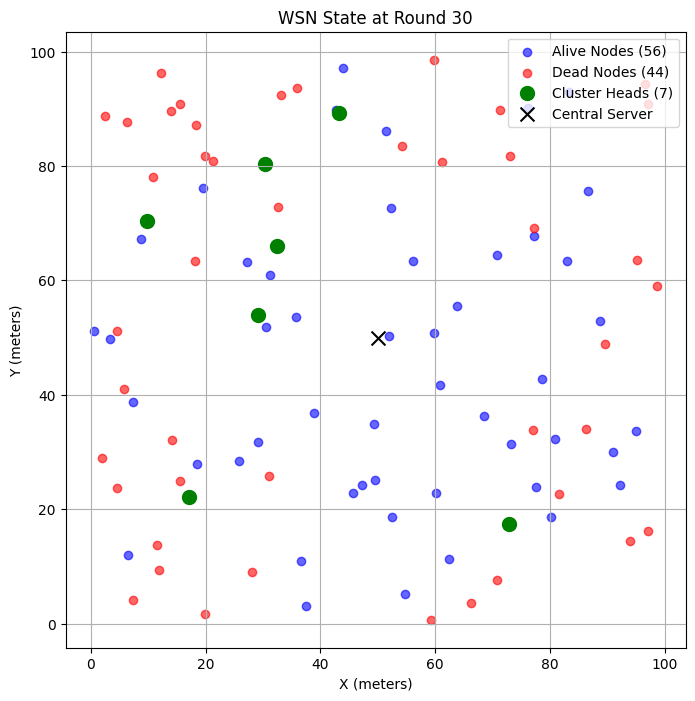

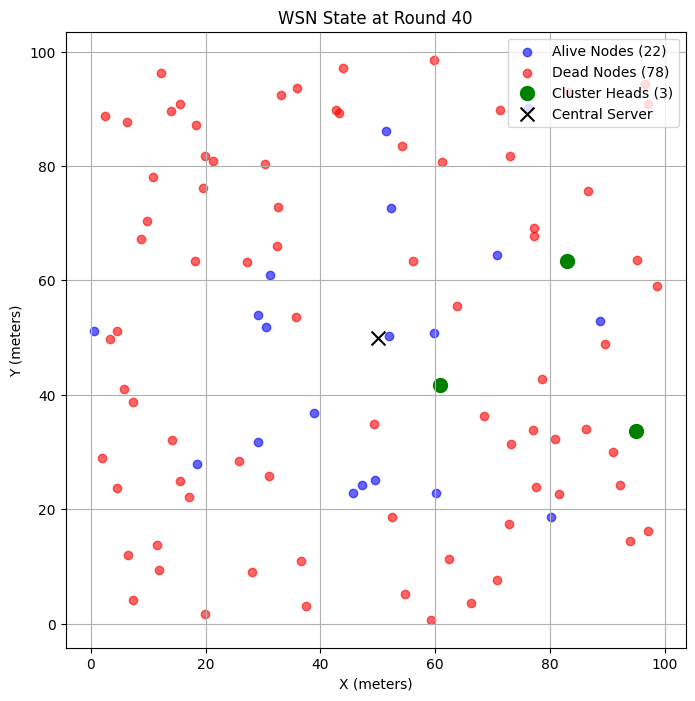

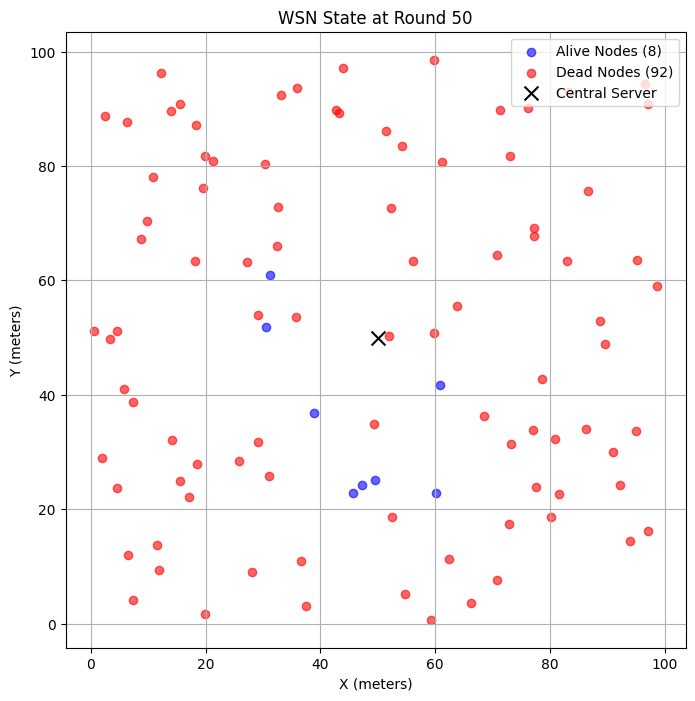

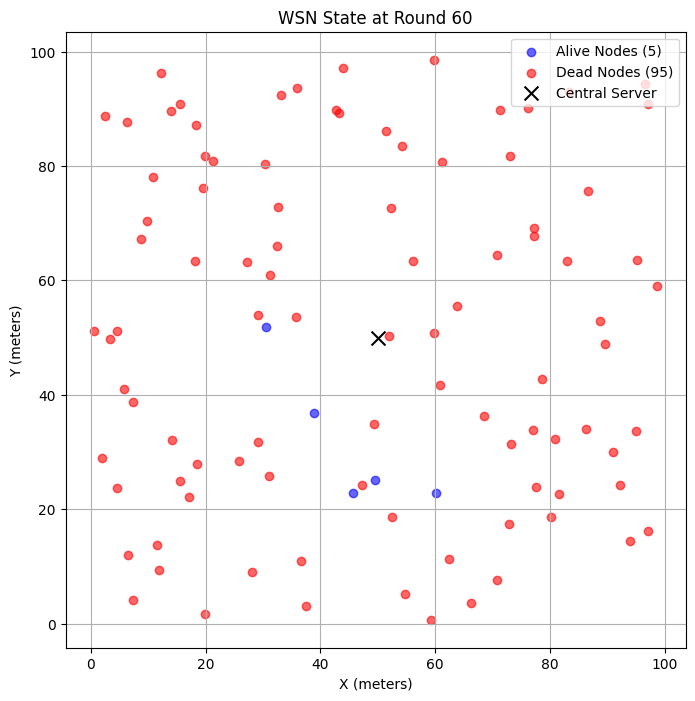

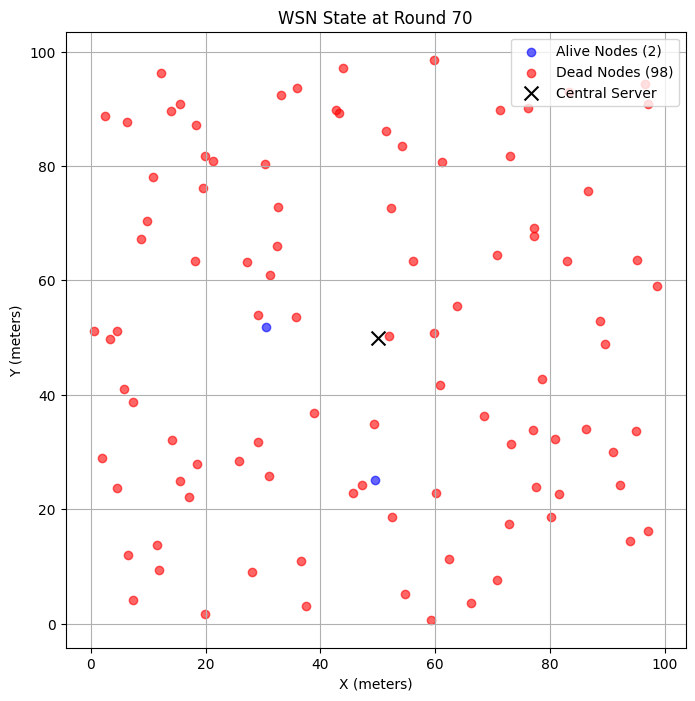

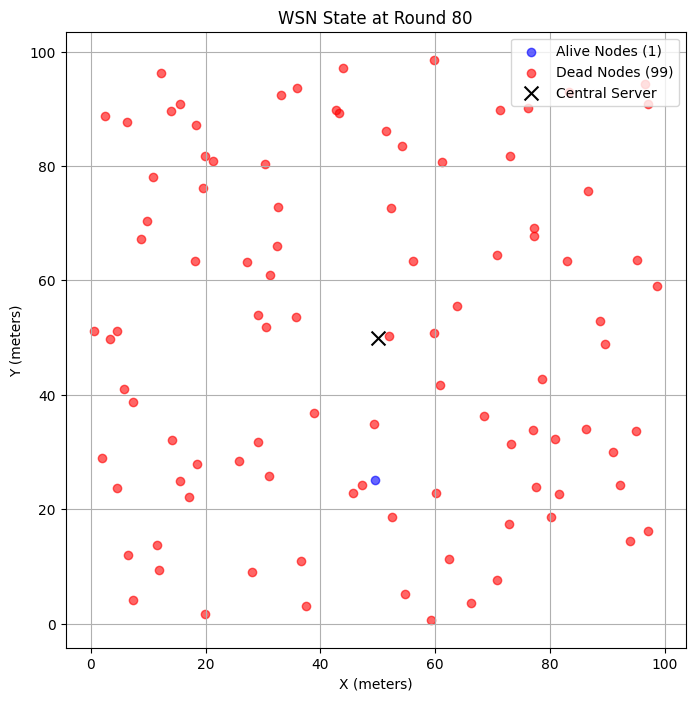

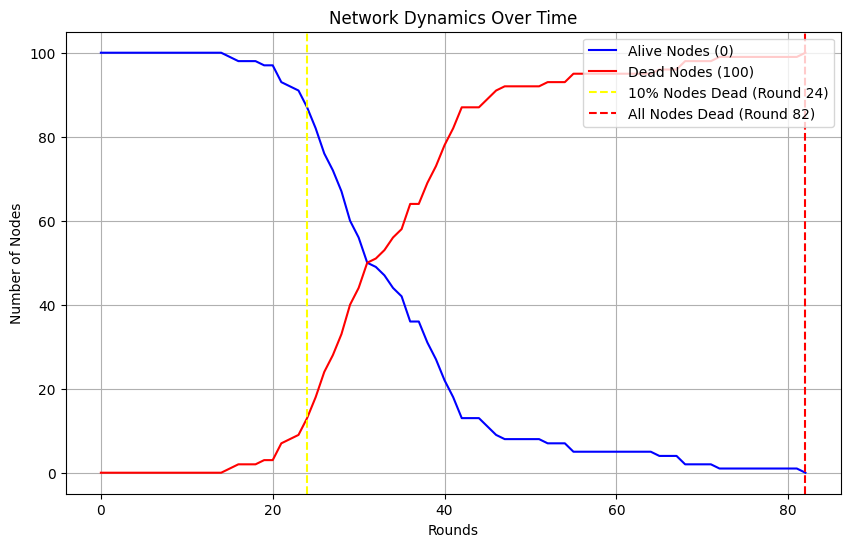

Network lifetime (10% nodes dead) is at round: 24
All nodes are dead at round: 82


In [ ]:
#2
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = int(input("Enter the number of nodes: "))  # Number of nodes
p = 0.1  # Probability of becoming a cluster head
Eo = 1000  # Initial energy (arbitrary units for easier visualization)
do = 20  # Optimal distance threshold
field_size = n  # Field size is set to N x N where N = number of nodes
server_x, server_y = field_size / 2, field_size / 2  # Central server position
rounds_per_cycle = int(1 / p)  # Rounds per cluster head cycle

# Deploy nodes
np.random.seed(42)
x_coords = np.random.uniform(0, field_size, n)
y_coords = np.random.uniform(0, field_size, n)
energies = np.full(n, Eo)  # Initial energy of nodes
cluster_head_history = np.zeros(n)  # Track cluster head status

# Visualization function
def plot_network(round_num, alive, dead, cluster_heads):
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords[alive], y_coords[alive], c='blue', label=f'Alive Nodes ({len(alive)})', alpha=0.6)
    plt.scatter(x_coords[dead], y_coords[dead], c='red', label=f'Dead Nodes ({len(dead)})', alpha=0.6)
    if cluster_heads:
        plt.scatter(x_coords[cluster_heads], y_coords[cluster_heads], c='green', s=100, label=f'Cluster Heads ({len(cluster_heads)})')
    plt.scatter(server_x, server_y, c='black', marker='x', s=100, label='Central Server')
    plt.title(f"WSN State at Round {round_num}")
    plt.xlabel("X (meters)")
    plt.ylabel("Y (meters)")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

# Main simulation loop
alive_nodes = []
dead_nodes = []
network_lifetime = -1  # Round when 10% nodes are dead
all_nodes_dead = -1  # Round when all nodes are dead
round_num = 0

while True:
    # Determine alive and dead nodes
    alive = np.where(energies > 0)[0]
    dead = np.where(energies <= 0)[0]
    alive_nodes.append(len(alive))
    dead_nodes.append(len(dead))

    # Check for network lifetime (10% nodes dead)
    if network_lifetime == -1 and len(dead) >= 0.1 * n:
        network_lifetime = round_num

    # Check for all nodes dead
    if all_nodes_dead == -1 and len(dead) == n:
        all_nodes_dead = round_num
        break  # End the simulation as all nodes are dead

    # Reset cluster head history every cycle
    if round_num % rounds_per_cycle == 0:
        cluster_head_history.fill(0)

    # Cluster head election based on LEACH protocol
    cluster_heads = []
    for i in alive:
        if cluster_head_history[i] == 0 and np.random.rand() <= p:
            cluster_heads.append(i)
            cluster_head_history[i] = 1  # Mark the node as a cluster head in this cycle
            # Energy dissipation for cluster head transmitting to the base station
            distance_to_server = np.sqrt((x_coords[i] - server_x) ** 2 + (y_coords[i] - server_y) ** 2)
            if distance_to_server > do:
                energies[i] -= 100 * (distance_to_server / do)
            else:
                energies[i] -= 100

    # Cluster formation and energy dissipation for non-cluster-head nodes
    if cluster_heads:
        for i in alive:
            if i not in cluster_heads:
                # Join the closest cluster head
                closest_ch = min(cluster_heads, key=lambda ch: np.sqrt((x_coords[i] - x_coords[ch])**2 + (y_coords[i] - y_coords[ch])**2))
                # Calculate the distance to the closest cluster head
                distance_to_ch = np.sqrt((x_coords[i] - x_coords[closest_ch])**2 + (y_coords[i] - y_coords[closest_ch])**2)
                # Energy dissipation based on the distance to the cluster head
                if distance_to_ch > do:
                    energies[i] -= 10 * (distance_to_ch / do)
                else:
                    energies[i] -= 10
                # Energy dissipation for the cluster head aggregating data
                energies[closest_ch] -= 5

    # Visualize network state at certain rounds
    if round_num % 10 == 0:
        plot_network(round_num, alive, dead, cluster_heads)

    round_num += 1  # Increment the round counter

# Plot network statistics
plt.figure(figsize=(10, 6))
plt.plot(range(len(alive_nodes)), alive_nodes, label=f"Alive Nodes ({alive_nodes[-1]})", color="blue")
plt.plot(range(len(dead_nodes)), dead_nodes, label=f"Dead Nodes ({dead_nodes[-1]})", color="red")

# Add vertical lines for milestones
if network_lifetime != -1:
    plt.axvline(x=network_lifetime, color='yellow', linestyle='--', label=f"10% Nodes Dead (Round {network_lifetime})")
if all_nodes_dead != -1:
    plt.axvline(x=all_nodes_dead, color='red', linestyle='--', label=f"All Nodes Dead (Round {all_nodes_dead})")

plt.title("Network Dynamics Over Time")
plt.xlabel("Rounds")
plt.ylabel("Number of Nodes")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# Print network milestones
if network_lifetime != -1:
    print(f"Network lifetime (10% nodes dead) is at round: {network_lifetime}")
print(f"All nodes are dead at round: {all_nodes_dead}")


Enter the number of nodes: 100


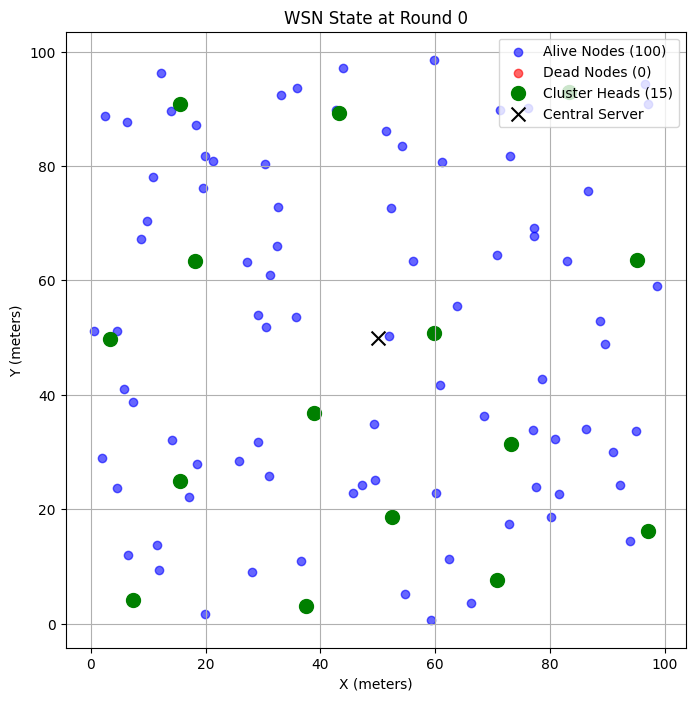

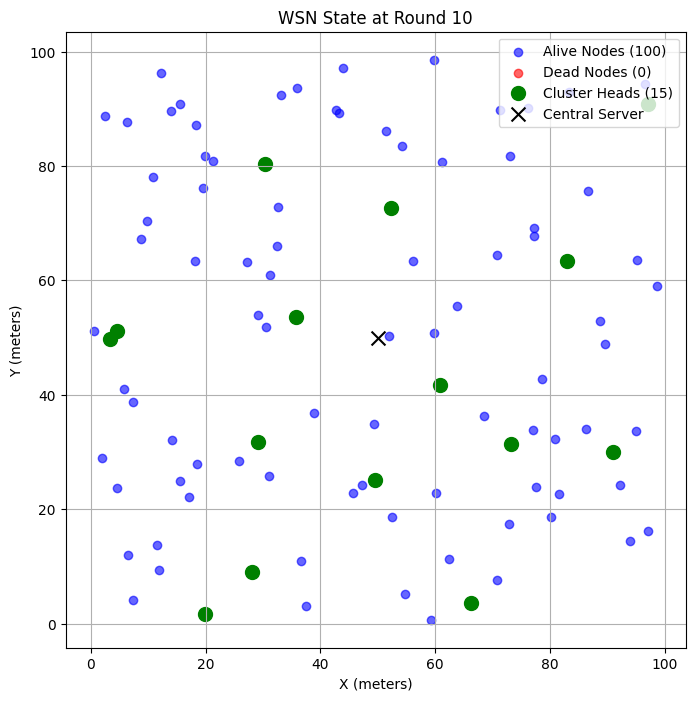

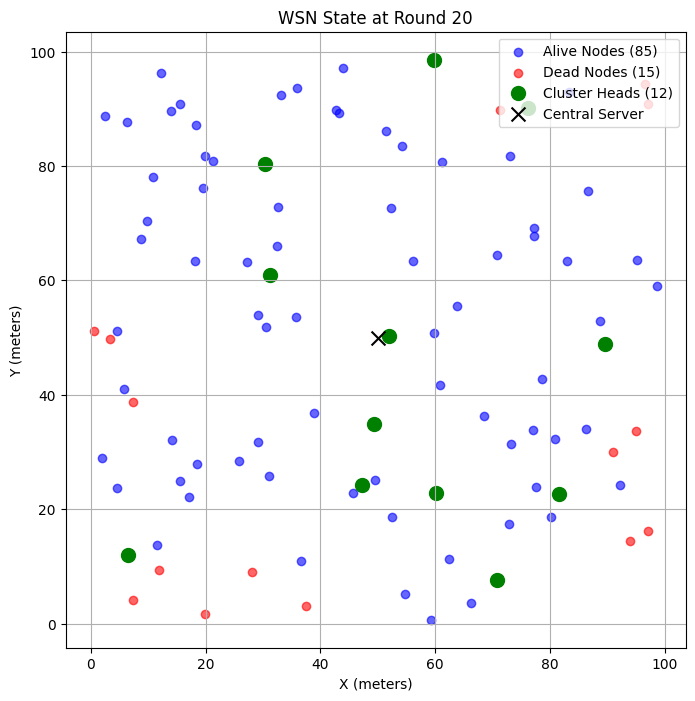

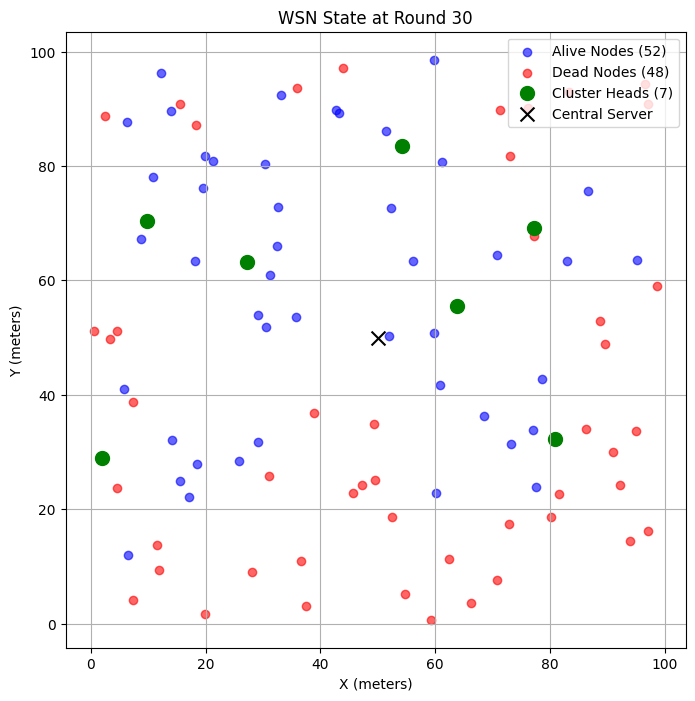

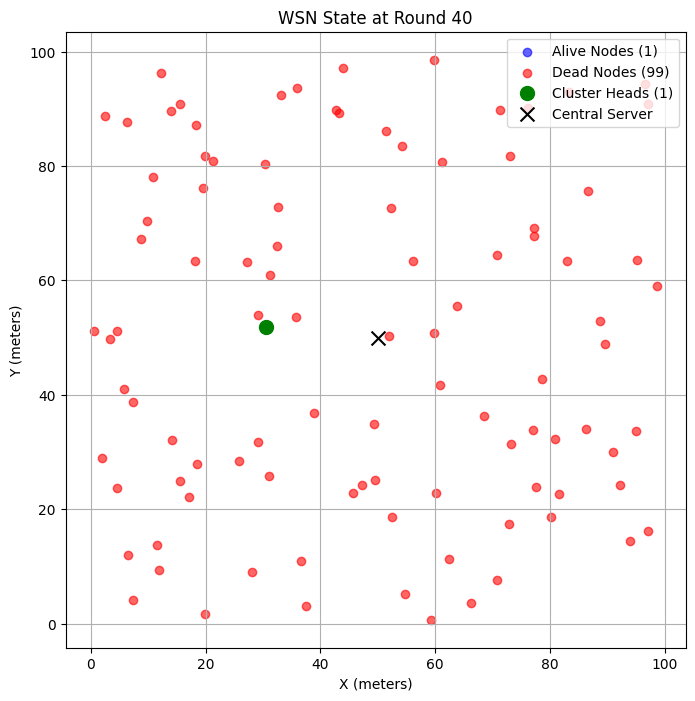

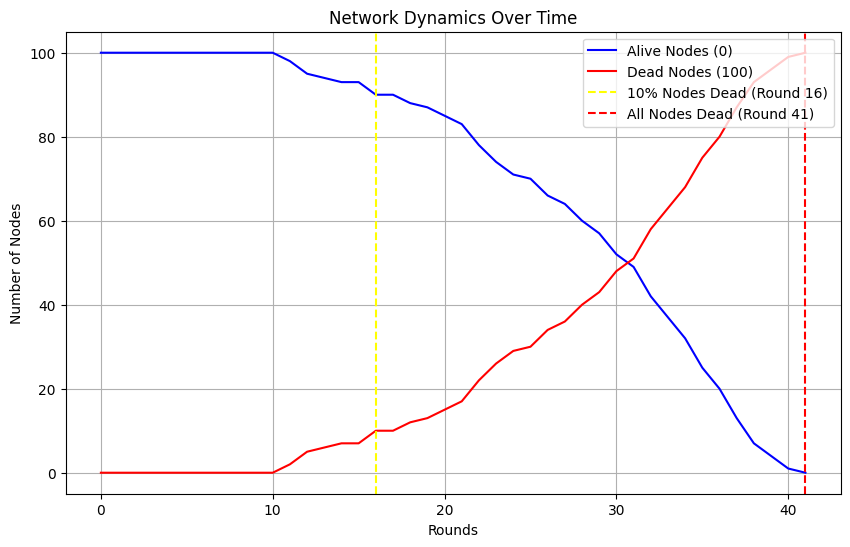

Network lifetime (10% nodes dead) is at round: 16
All nodes are dead at round: 41


In [ ]:
#3
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = int(input("Enter the number of nodes: "))  # Number of nodes
p = 0.1  # Probability of forming clusters (used only to limit CH formation initially)
Eo = 1000  # Initial energy (arbitrary units for easier visualization)
do = 20  # Optimal distance threshold
field_size = n  # Field size is set to N x N where N = number of nodes
server_x, server_y = field_size / 2, field_size / 2  # Central server position

# Deploy nodes
np.random.seed(42)
x_coords = np.random.uniform(0, field_size, n)
y_coords = np.random.uniform(0, field_size, n)
energies = np.full(n, Eo)  # Initial energy of nodes

# Visualization function
def plot_network(round_num, alive, dead, cluster_heads):
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords[alive], y_coords[alive], c='blue', label=f'Alive Nodes ({len(alive)})', alpha=0.6)
    plt.scatter(x_coords[dead], y_coords[dead], c='red', label=f'Dead Nodes ({len(dead)})', alpha=0.6)
    if cluster_heads:
        plt.scatter(x_coords[cluster_heads], y_coords[cluster_heads], c='green', s=100, label=f'Cluster Heads ({len(cluster_heads)})')
    plt.scatter(server_x, server_y, c='black', marker='x', s=100, label='Central Server')
    plt.title(f"WSN State at Round {round_num}")
    plt.xlabel("X (meters)")
    plt.ylabel("Y (meters)")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

# Main simulation loop
alive_nodes = []
dead_nodes = []
network_lifetime = -1  # Round when 10% nodes are dead
all_nodes_dead = -1  # Round when all nodes are dead
round_num = 0

while True:
    # Determine alive and dead nodes
    alive = np.where(energies > 0)[0]
    dead = np.where(energies <= 0)[0]
    alive_nodes.append(len(alive))
    dead_nodes.append(len(dead))

    # Check for network lifetime (10% nodes dead)
    if network_lifetime == -1 and len(dead) >= 0.1 * n:
        network_lifetime = round_num

    # Check for all nodes dead
    if all_nodes_dead == -1 and len(dead) == n:
        all_nodes_dead = round_num
        break  # End the simulation as all nodes are dead

    # Form clusters and choose cluster heads dynamically
    clusters = {}  # Dictionary to store clusters and their members
    cluster_heads = []  # Keep track of current cluster heads
    for node in alive:
        # Assign each node to the nearest CH or create a new cluster
        if not cluster_heads:
            cluster_heads.append(node)  # First alive node becomes the CH
            clusters[node] = [node]
        else:
            # Find the nearest CH
            nearest_ch = min(cluster_heads, key=lambda ch: np.sqrt((x_coords[node] - x_coords[ch])**2 + (y_coords[node] - y_coords[ch])**2))
            distance_to_ch = np.sqrt((x_coords[node] - x_coords[nearest_ch])**2 + (y_coords[node] - y_coords[nearest_ch])**2)
            if distance_to_ch <= do:
                clusters[nearest_ch].append(node)  # Add to the nearest CH's cluster
            else:
                # Create a new cluster if no CH is within range
                cluster_heads.append(node)
                clusters[node] = [node]

    # Update CHs dynamically based on highest energy within each cluster
    new_clusters = {}
    new_cluster_heads = []
    for ch, members in clusters.items():
        new_ch = max(members, key=lambda node: energies[node])  # Find highest-energy node in the cluster
        new_cluster_heads.append(new_ch)
        new_clusters[new_ch] = members

    clusters = new_clusters
    cluster_heads = new_cluster_heads

    # Energy dissipation for normal nodes transmitting to CHs
    if cluster_heads:
        for ch in cluster_heads:
            cluster_members = clusters[ch]
            for node in cluster_members:
                if node != ch:  # Skip the CH itself
                    distance_to_ch = np.sqrt((x_coords[node] - x_coords[ch])**2 + (y_coords[node] - y_coords[ch])**2)
                    if distance_to_ch > do:
                        energies[node] -= 10 * (distance_to_ch / do)
                    else:
                        energies[node] -= 10  # Default dissipation if within range

    # Energy dissipation for CHs transmitting to the central server
    for ch in cluster_heads:
        distance_to_server = np.sqrt((x_coords[ch] - server_x)**2 + (y_coords[ch] - server_y)**2)
        if distance_to_server > do:
            energies[ch] -= 100 * (distance_to_server / do)
        else:
            energies[ch] -= 100  # Default dissipation if within range

    # Visualize network state at certain rounds
    if round_num % 10 == 0:
        plot_network(round_num, alive, dead, cluster_heads)

    round_num += 1  # Increment the round counter

# Plot network statistics
plt.figure(figsize=(10, 6))
plt.plot(range(len(alive_nodes)), alive_nodes, label=f"Alive Nodes ({alive_nodes[-1]})", color="blue")
plt.plot(range(len(dead_nodes)), dead_nodes, label=f"Dead Nodes ({dead_nodes[-1]})", color="red")

# Add vertical lines for milestones
if network_lifetime != -1:
    plt.axvline(x=network_lifetime, color='yellow', linestyle='--', label=f"10% Nodes Dead (Round {network_lifetime})")
if all_nodes_dead != -1:
    plt.axvline(x=all_nodes_dead, color='red', linestyle='--', label=f"All Nodes Dead (Round {all_nodes_dead})")

plt.title("Network Dynamics Over Time")
plt.xlabel("Rounds")
plt.ylabel("Number of Nodes")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# Print network milestones
if network_lifetime != -1:
    print(f"Network lifetime (10% nodes dead) is at round: {network_lifetime}")
print(f"All nodes are dead at round: {all_nodes_dead}")


Enter the number of nodes: 100


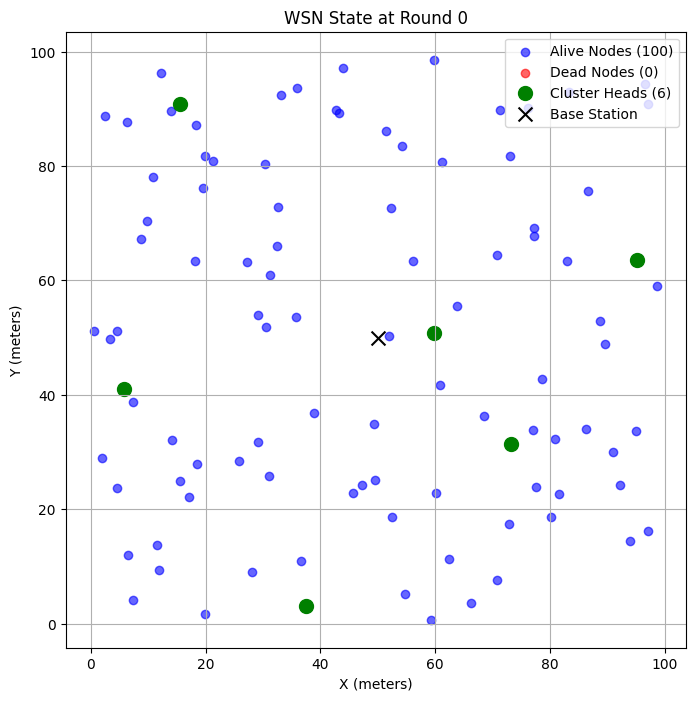

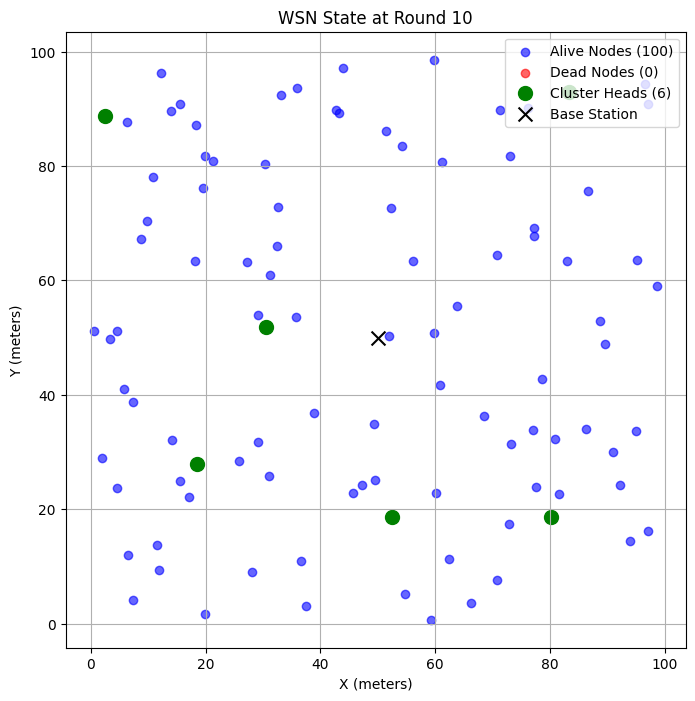

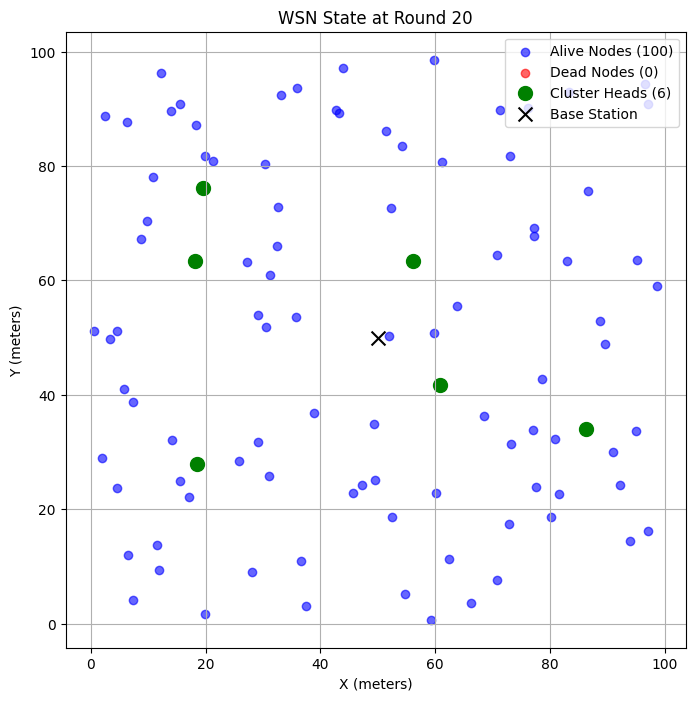

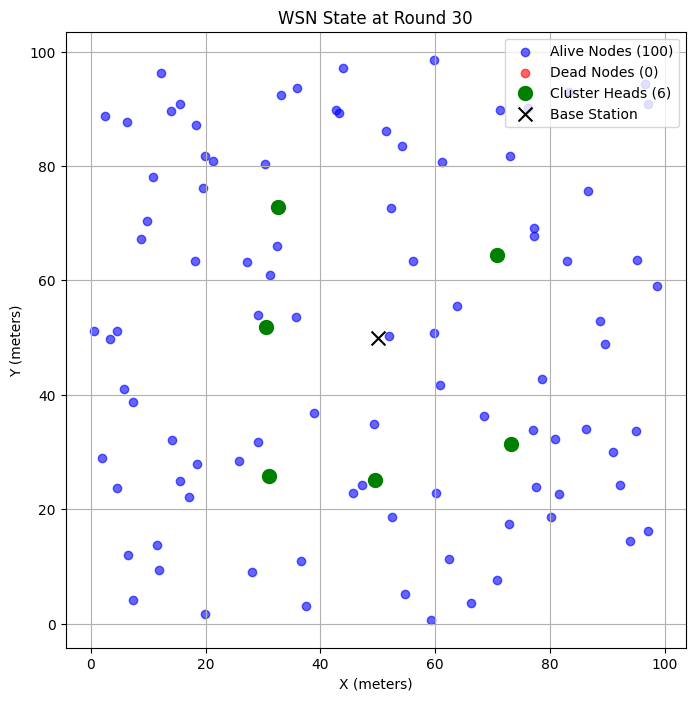

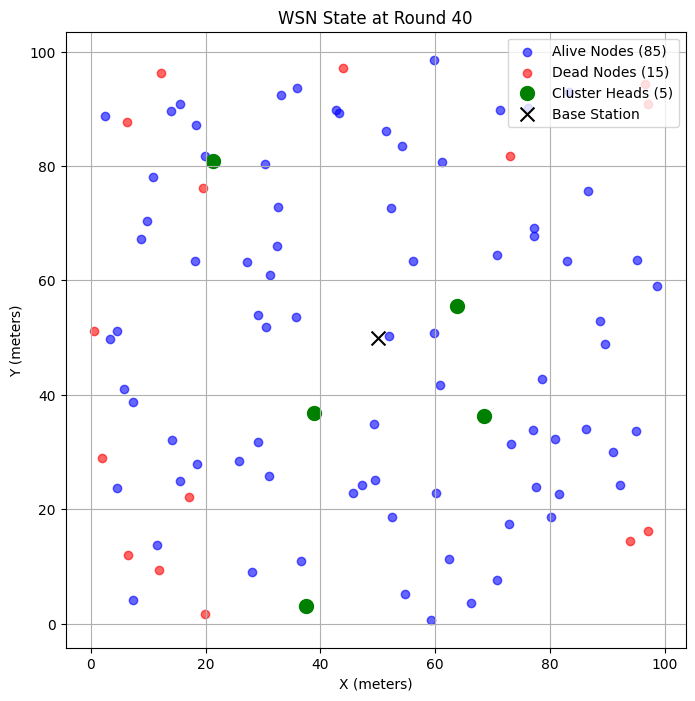

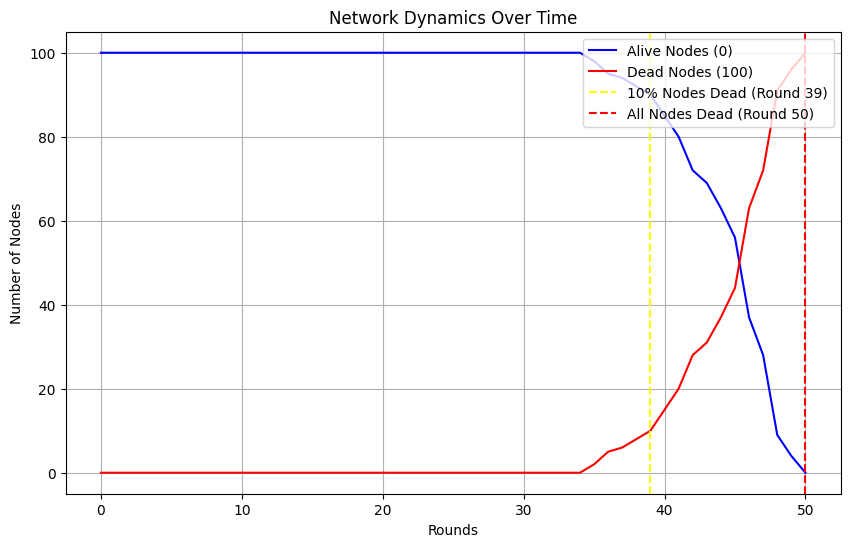

Network lifetime (10% nodes dead) is at round: 39
All nodes are dead at round: 50


In [ ]:
#5
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Parameters
xm, ym = 100, 100  # Field dimensions (meters)
n = int(input("Enter the number of nodes: "))  # Number of nodes (customizable)
Eo = 1000  # Initial energy (arbitrary units for easier visualization)
do = 20  # Optimal distance threshold
sink_x, sink_y = xm / 2, ym / 2  # Base station position
threshold_nodes_per_ch = 15  # Threshold for number of nodes per cluster head

# Deploy nodes
np.random.seed(42)
x_coords = np.random.uniform(0, xm, n)
y_coords = np.random.uniform(0, ym, n)
energies = np.full(n, Eo)  # Initial energy of nodes

# Visualization function
def plot_network(round_num, alive, dead, cluster_heads, cluster_centers):
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords[alive], y_coords[alive], c='blue', label=f'Alive Nodes ({len(alive)})', alpha=0.6)
    plt.scatter(x_coords[dead], y_coords[dead], c='red', label=f'Dead Nodes ({len(dead)})', alpha=0.6)
    if cluster_heads:
        plt.scatter(x_coords[cluster_heads], y_coords[cluster_heads], c='green', s=100, label=f'Cluster Heads ({len(cluster_heads)})')
    plt.scatter(sink_x, sink_y, c='black', marker='x', s=100, label='Base Station')
    plt.title(f"WSN State at Round {round_num}")
    plt.xlabel("X (meters)")
    plt.ylabel("Y (meters)")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

# Helper function to determine the number of CHs for a cluster
def determine_num_ch(cluster_size):
    return max(1, cluster_size // threshold_nodes_per_ch)

# Main simulation loop
alive_nodes = []
dead_nodes = []
network_lifetime = -1  # Round when 10% nodes are dead
all_nodes_dead = -1  # Round when all nodes are dead
round_num = 0

while True:
    # Determine alive and dead nodes
    alive = np.where(energies > 0)[0]
    dead = np.where(energies <= 0)[0]
    alive_nodes.append(len(alive))
    dead_nodes.append(len(dead))

    # Check for network lifetime (10% nodes dead)
    if network_lifetime == -1 and len(dead) >= 0.1 * n:
        network_lifetime = round_num

    # Check for all nodes dead
    if all_nodes_dead == -1 and len(dead) == n:
        all_nodes_dead = round_num
        break  # End the simulation as all nodes are dead

    # Clustering using K-means
    alive_coords = np.column_stack((x_coords[alive], y_coords[alive]))
    num_clusters = max(1, len(alive) // threshold_nodes_per_ch)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(alive_coords)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    # Assign nodes to clusters
    clusters = {i: [] for i in range(num_clusters)}
    for idx, label in zip(alive, cluster_labels):
        clusters[label].append(idx)

    # Determine cluster heads for each cluster
    cluster_heads = []
    for cluster_id, nodes in clusters.items():
        num_ch = determine_num_ch(len(nodes))
        if len(nodes) <= num_ch:
            cluster_heads.extend(nodes)
        else:
            sorted_by_energy = sorted(nodes, key=lambda i: energies[i], reverse=True)
            cluster_heads.extend(sorted_by_energy[:num_ch])

    # Energy dissipation for cluster heads
    for ch in cluster_heads:
        distance_to_bs = np.sqrt((x_coords[ch] - sink_x) ** 2 + (y_coords[ch] - sink_y) ** 2)
        if distance_to_bs > do:
            energies[ch] -= 100 * (distance_to_bs / do)
        else:
            energies[ch] -= 100

    # Energy dissipation for normal nodes transmitting to CHs
    for cluster_id, nodes in clusters.items():
        current_ch = [ch for ch in cluster_heads if ch in nodes]
        for node in nodes:
            if node not in cluster_heads:
                closest_ch = min(current_ch, key=lambda ch: np.sqrt((x_coords[node] - x_coords[ch]) ** 2 + (y_coords[node] - y_coords[ch]) ** 2))
                distance_to_ch = np.sqrt((x_coords[node] - x_coords[closest_ch]) ** 2 + (y_coords[node] - y_coords[closest_ch]) ** 2)
                if distance_to_ch > do:
                    energies[node] -= 10 * (distance_to_ch / do)
                else:
                    energies[node] -= 10

    # Visualize network state at certain rounds
    if round_num % 10 == 0:
        plot_network(round_num, alive, dead, cluster_heads, cluster_centers)

    round_num += 1  # Increment the round counter

# Plot network statistics
plt.figure(figsize=(10, 6))
plt.plot(range(len(alive_nodes)), alive_nodes, label=f"Alive Nodes ({alive_nodes[-1]})", color="blue")
plt.plot(range(len(dead_nodes)), dead_nodes, label=f"Dead Nodes ({dead_nodes[-1]})", color="red")

# Add vertical lines for milestones
if network_lifetime != -1:
    plt.axvline(x=network_lifetime, color='yellow', linestyle='--', label=f"10% Nodes Dead (Round {network_lifetime})")
if all_nodes_dead != -1:
    plt.axvline(x=all_nodes_dead, color='red', linestyle='--', label=f"All Nodes Dead (Round {all_nodes_dead})")

plt.title("Network Dynamics Over Time")
plt.xlabel("Rounds")
plt.ylabel("Number of Nodes")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# Print network milestones
if network_lifetime != -1:
    print(f"Network lifetime (10% nodes dead) is at round: {network_lifetime}")
print(f"All nodes are dead at round: {all_nodes_dead}")


Enter the number of nodes: 100


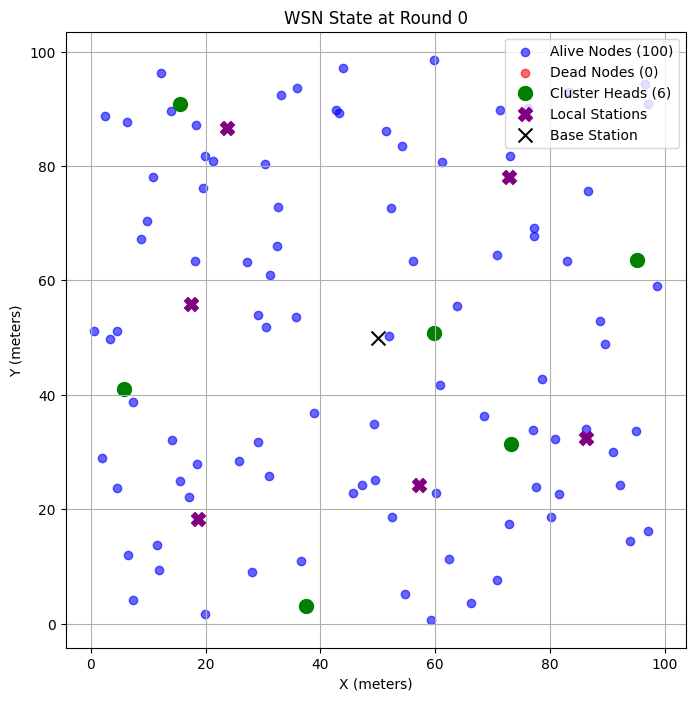

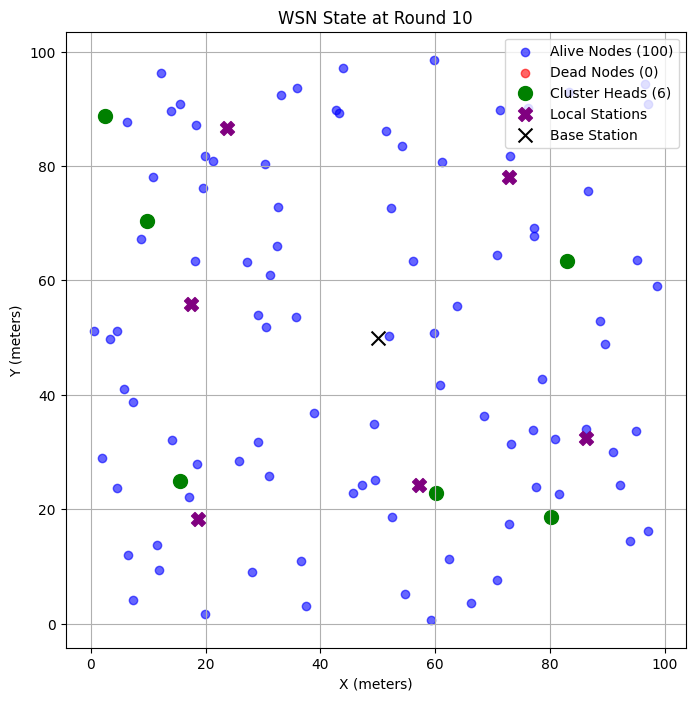

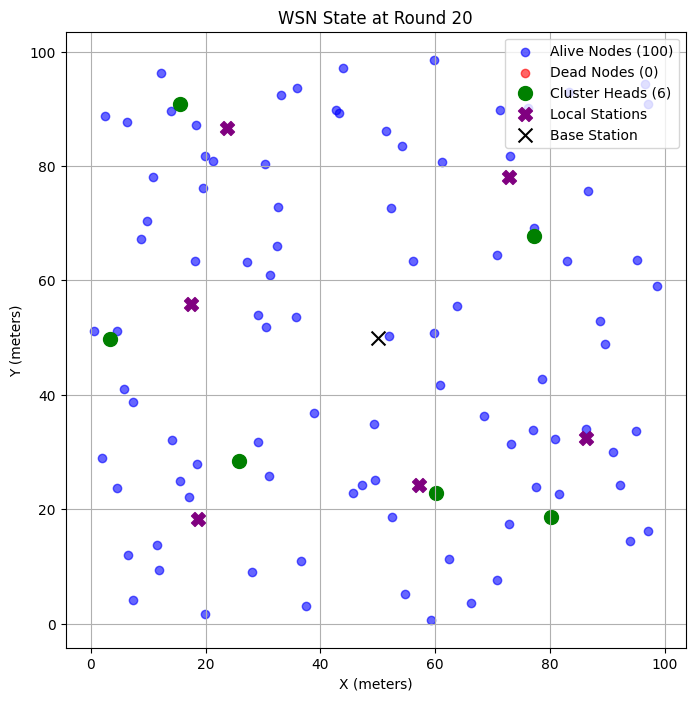

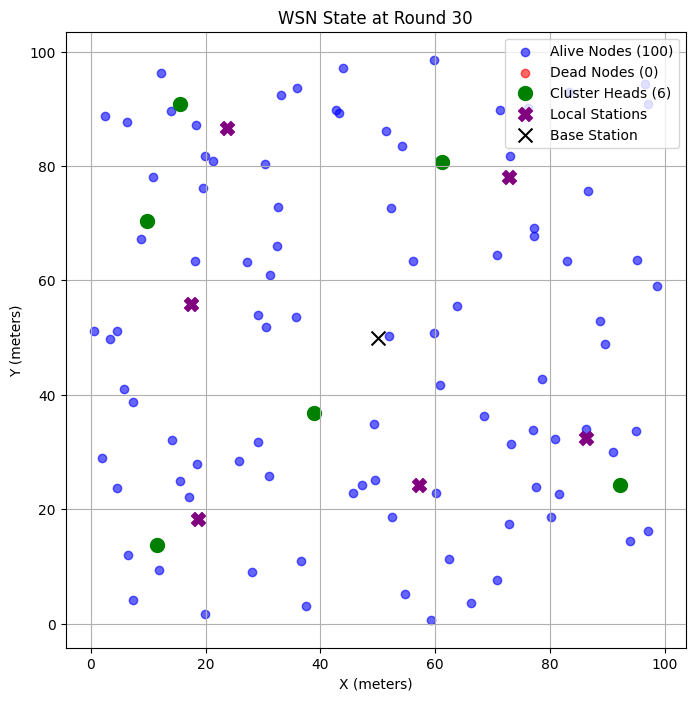

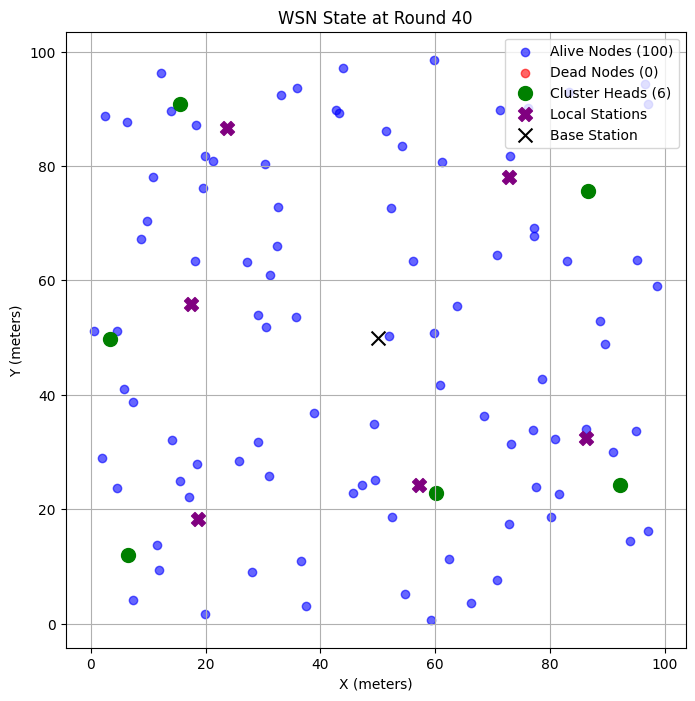

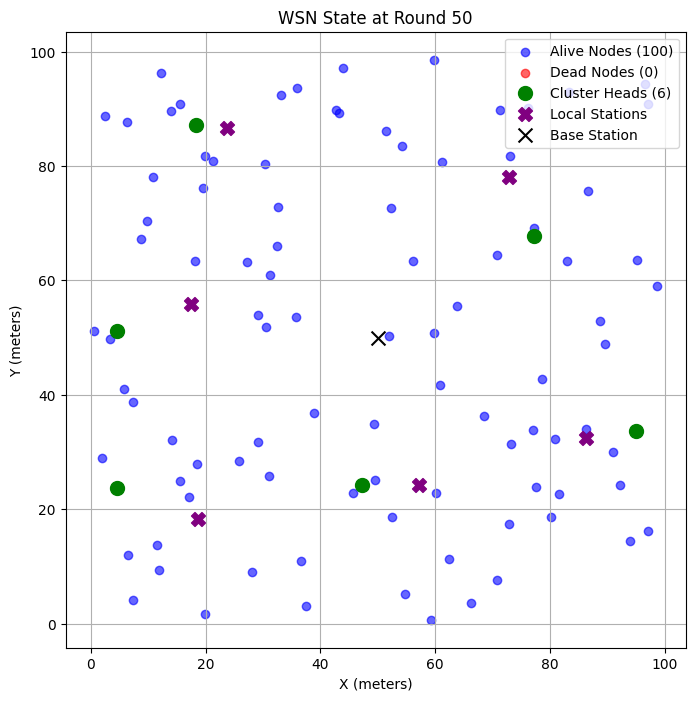

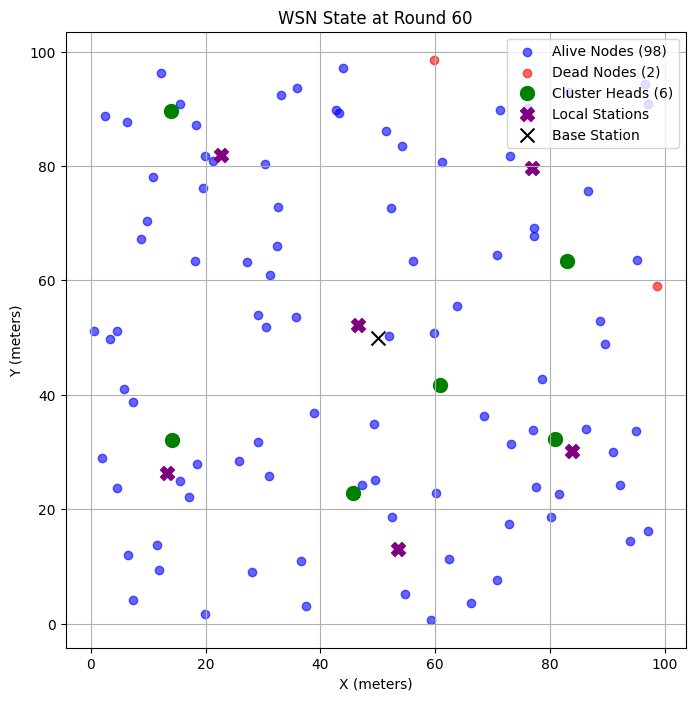

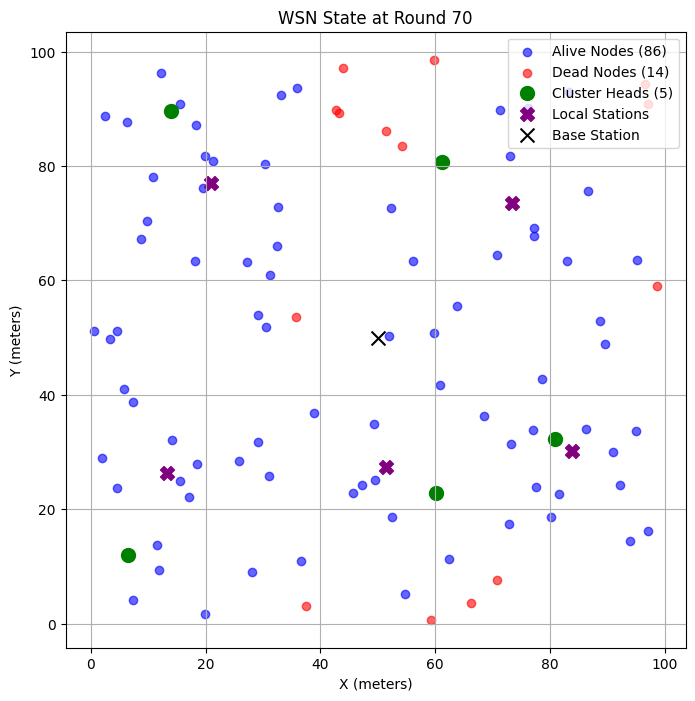

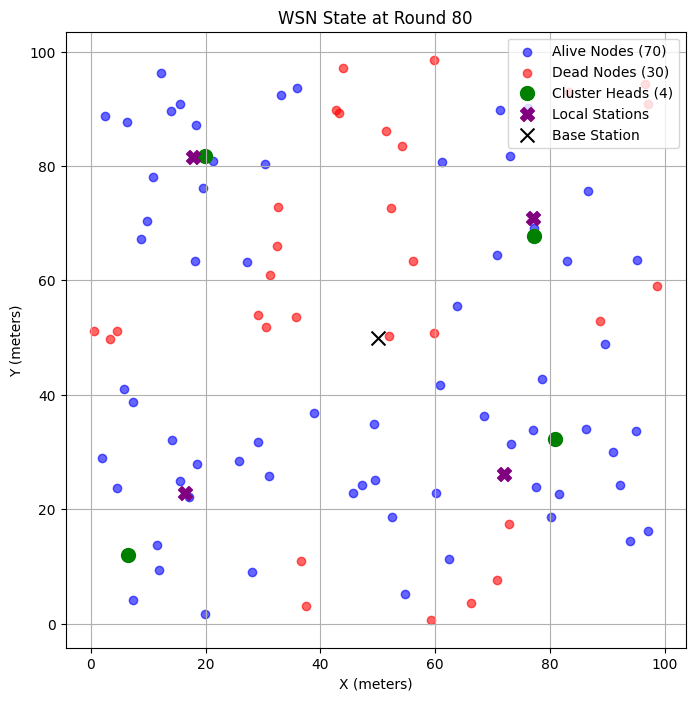

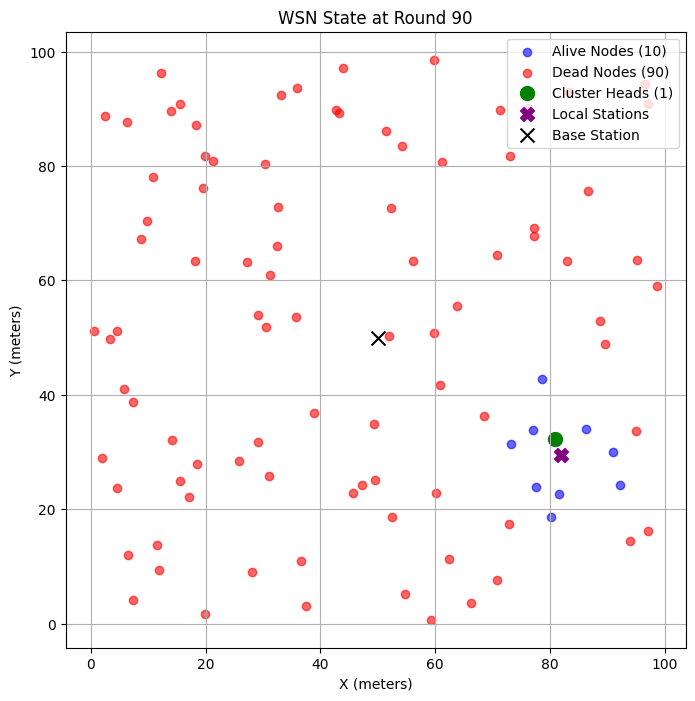

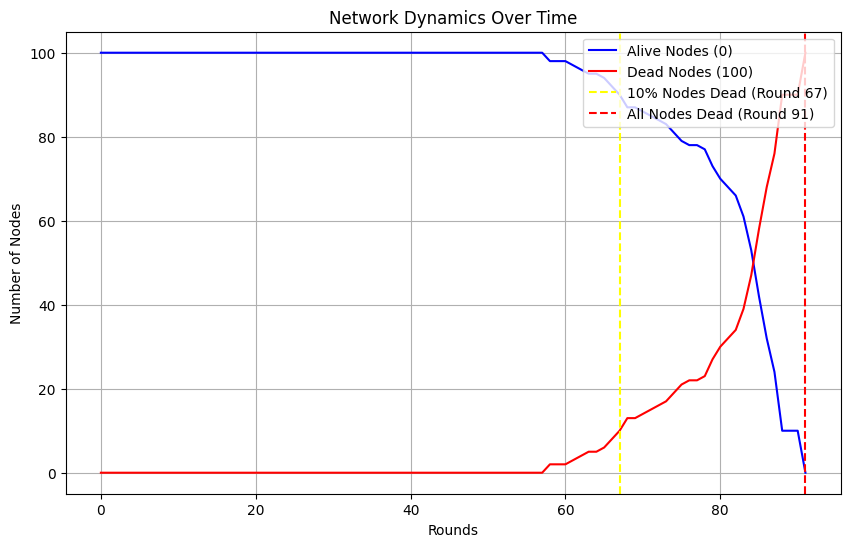

Network lifetime (10% nodes dead) is at round: 67
All nodes are dead at round: 91


In [ ]:
#6
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Parameters
xm, ym = 100, 100  # Field dimensions (meters)
n = int(input("Enter the number of nodes: "))  # Number of nodes (customizable)
Eo = 1000  # Initial energy (arbitrary units for easier visualization)
do = 20  # Optimal distance threshold
sink_x, sink_y = xm / 2, ym / 2  # Base station position
threshold_nodes_per_ch = 15  # Threshold for number of nodes per cluster head

# Deploy nodes
np.random.seed(42)
x_coords = np.random.uniform(0, xm, n)
y_coords = np.random.uniform(0, ym, n)
energies = np.full(n, Eo)  # Initial energy of nodes

# Visualization function
def plot_network(round_num, alive, dead, cluster_heads, cluster_centers, local_stations):
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords[alive], y_coords[alive], c='blue', label=f'Alive Nodes ({len(alive)})', alpha=0.6)
    plt.scatter(x_coords[dead], y_coords[dead], c='red', label=f'Dead Nodes ({len(dead)})', alpha=0.6)
    if cluster_heads:
        plt.scatter(x_coords[cluster_heads], y_coords[cluster_heads], c='green', s=100, label=f'Cluster Heads ({len(cluster_heads)})')
    if local_stations is not None:
        plt.scatter(local_stations[:, 0], local_stations[:, 1], c='purple', s=100, marker='X', label='Local Stations')
    plt.scatter(sink_x, sink_y, c='black', marker='x', s=100, label='Base Station')
    plt.title(f"WSN State at Round {round_num}")
    plt.xlabel("X (meters)")
    plt.ylabel("Y (meters)")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

# Helper function to determine the number of CHs for a cluster
def determine_num_ch(cluster_size):
    return max(1, cluster_size // threshold_nodes_per_ch)

# Main simulation loop
alive_nodes = []
dead_nodes = []
network_lifetime = -1  # Round when 10% nodes are dead
all_nodes_dead = -1  # Round when all nodes are dead
round_num = 0

while True:
    # Determine alive and dead nodes
    alive = np.where(energies > 0)[0]
    dead = np.where(energies <= 0)[0]
    alive_nodes.append(len(alive))
    dead_nodes.append(len(dead))

    # Check for network lifetime (10% nodes dead)
    if network_lifetime == -1 and len(dead) >= 0.1 * n:
        network_lifetime = round_num

    # Check for all nodes dead
    if all_nodes_dead == -1 and len(dead) == n:
        all_nodes_dead = round_num
        break  # End the simulation as all nodes are dead

    # Clustering using K-means
    alive_coords = np.column_stack((x_coords[alive], y_coords[alive]))
    num_clusters = max(1, len(alive) // threshold_nodes_per_ch)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(alive_coords)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    # Assign nodes to clusters
    clusters = {i: [] for i in range(num_clusters)}
    for idx, label in zip(alive, cluster_labels):
        clusters[label].append(idx)

    # Assign local stations at cluster centers
    local_stations = cluster_centers

    # Determine cluster heads for each cluster
    cluster_heads = []
    for cluster_id, nodes in clusters.items():
        num_ch = determine_num_ch(len(nodes))
        if len(nodes) <= num_ch:
            cluster_heads.extend(nodes)
        else:
            sorted_by_energy = sorted(nodes, key=lambda i: energies[i], reverse=True)
            cluster_heads.extend(sorted_by_energy[:num_ch])

    # Energy dissipation for normal nodes transmitting to CHs
    for cluster_id, nodes in clusters.items():
        current_ch = [ch for ch in cluster_heads if ch in nodes]
        for node in nodes:
            if node not in cluster_heads:
                closest_ch = min(current_ch, key=lambda ch: np.sqrt((x_coords[node] - x_coords[ch]) ** 2 + (y_coords[node] - y_coords[ch]) ** 2))
                distance_to_ch = np.sqrt((x_coords[node] - x_coords[closest_ch]) ** 2 + (y_coords[node] - y_coords[closest_ch]) ** 2)
                if distance_to_ch > do:
                    energies[node] -= 10 * (distance_to_ch / do)
                else:
                    energies[node] -= 10

    # Energy dissipation for cluster heads transmitting to local stations
    for cluster_id, chs in clusters.items():
        for ch in cluster_heads:
            if ch in chs:
                local_station_x, local_station_y = local_stations[cluster_id]
                distance_to_ls = np.sqrt((x_coords[ch] - local_station_x) ** 2 + (y_coords[ch] - local_station_y) ** 2)
                if distance_to_ls > do:
                    energies[ch] -= 20 * (distance_to_ls / do)
                else:
                    energies[ch] -= 20

    # Visualize network state at certain rounds
    if round_num % 10 == 0:
        plot_network(round_num, alive, dead, cluster_heads, cluster_centers, local_stations)

    round_num += 1  # Increment the round counter

# Plot network statistics
plt.figure(figsize=(10, 6))
plt.plot(range(len(alive_nodes)), alive_nodes, label=f"Alive Nodes ({alive_nodes[-1]})", color="blue")
plt.plot(range(len(dead_nodes)), dead_nodes, label=f"Dead Nodes ({dead_nodes[-1]})", color="red")

# Add vertical lines for milestones
if network_lifetime != -1:
    plt.axvline(x=network_lifetime, color='yellow', linestyle='--', label=f"10% Nodes Dead (Round {network_lifetime})")
if all_nodes_dead != -1:
    plt.axvline(x=all_nodes_dead, color='red', linestyle='--', label=f"All Nodes Dead (Round {all_nodes_dead})")

plt.title("Network Dynamics Over Time")
plt.xlabel("Rounds")
plt.ylabel("Number of Nodes")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# Print network milestones
if network_lifetime != -1:
    print(f"Network lifetime (10% nodes dead) is at round: {network_lifetime}")
print(f"All nodes are dead at round: {all_nodes_dead}")


Enter the number of nodes: 100


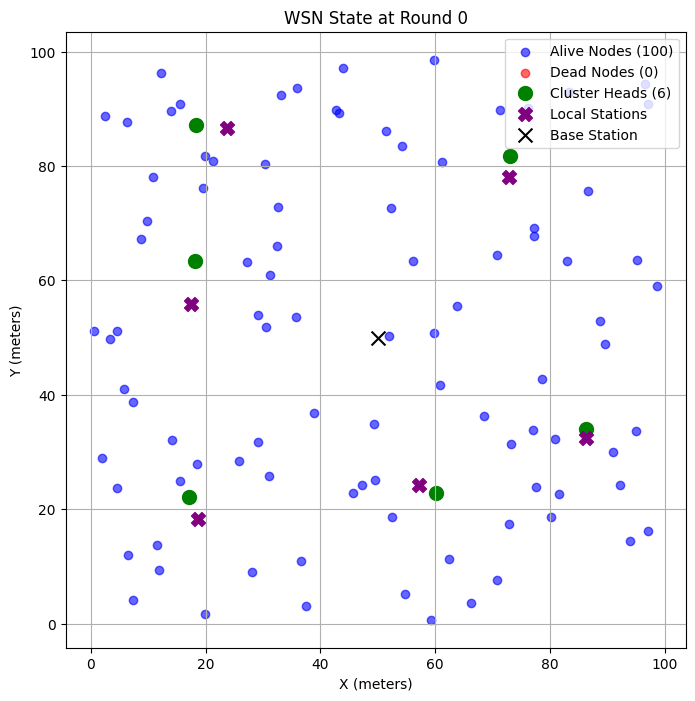

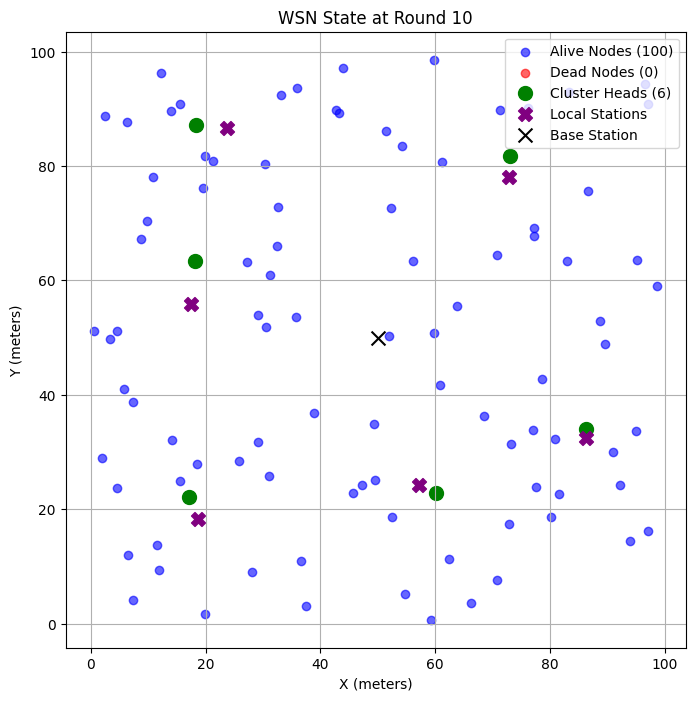

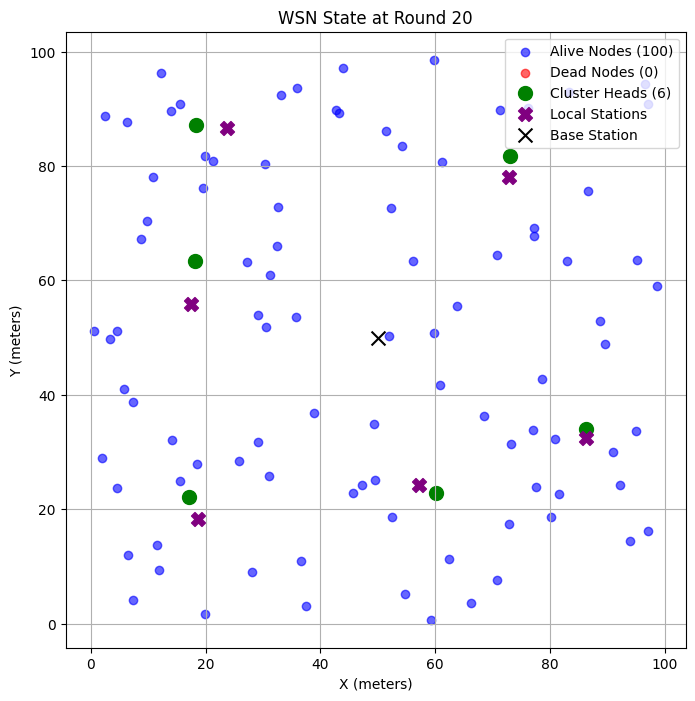

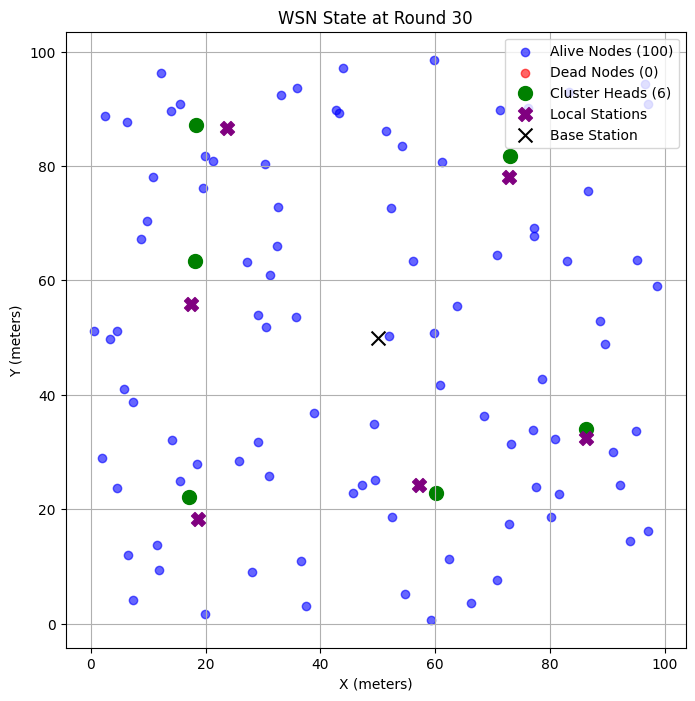

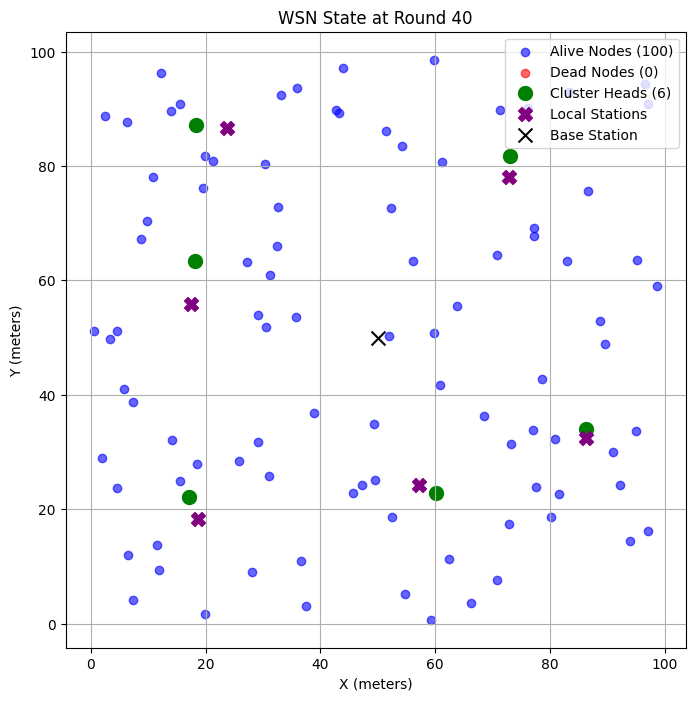

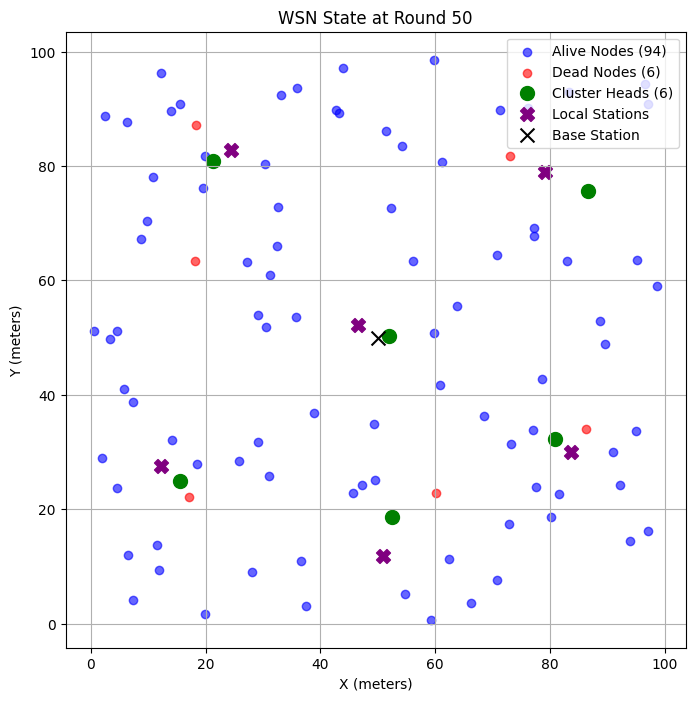

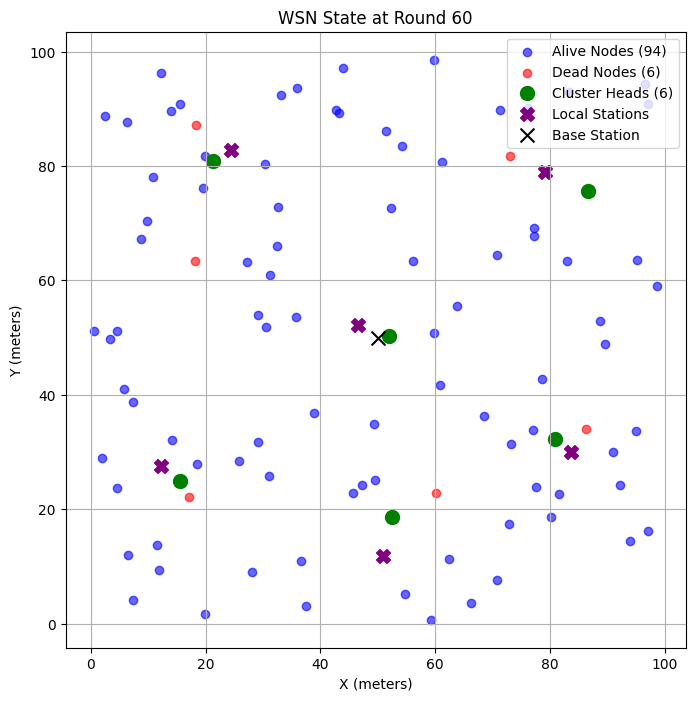

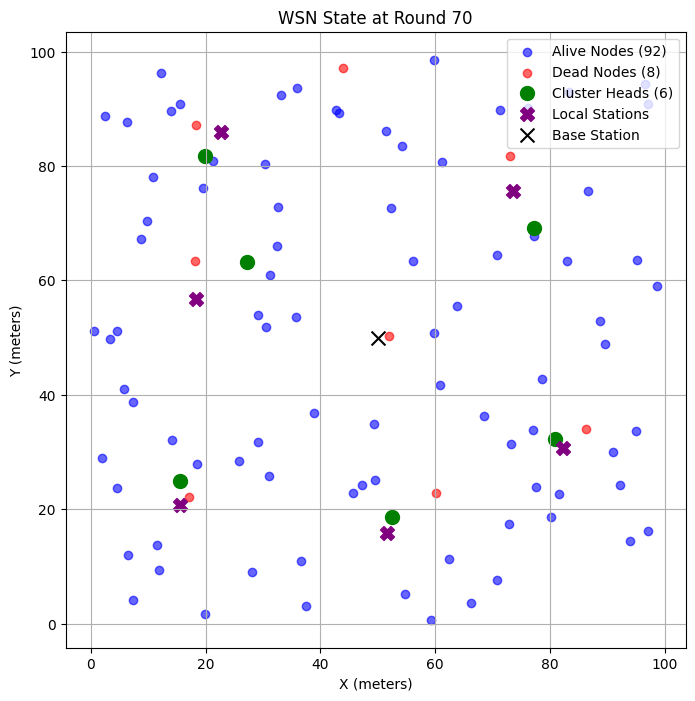

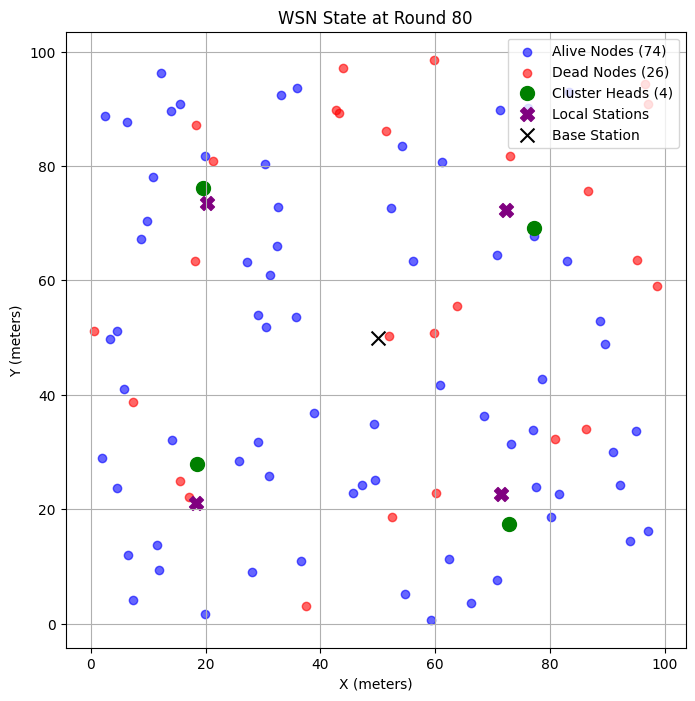

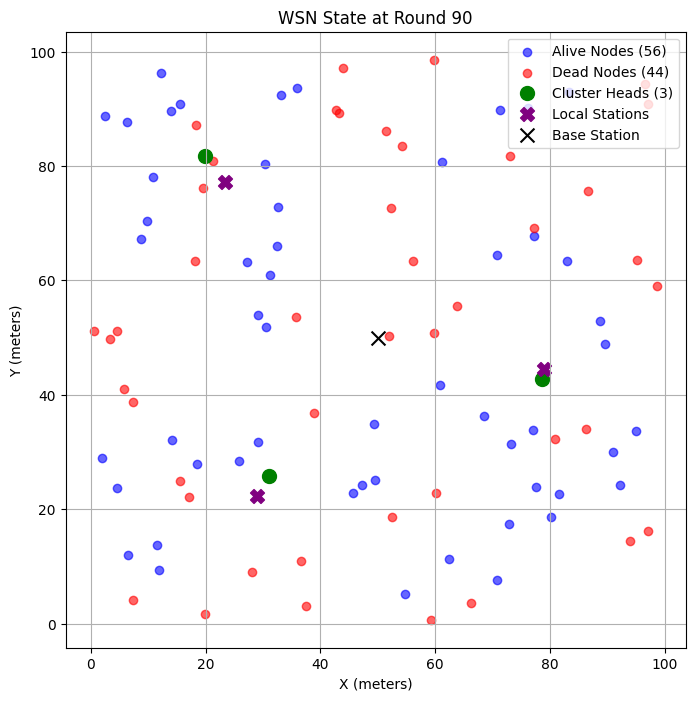

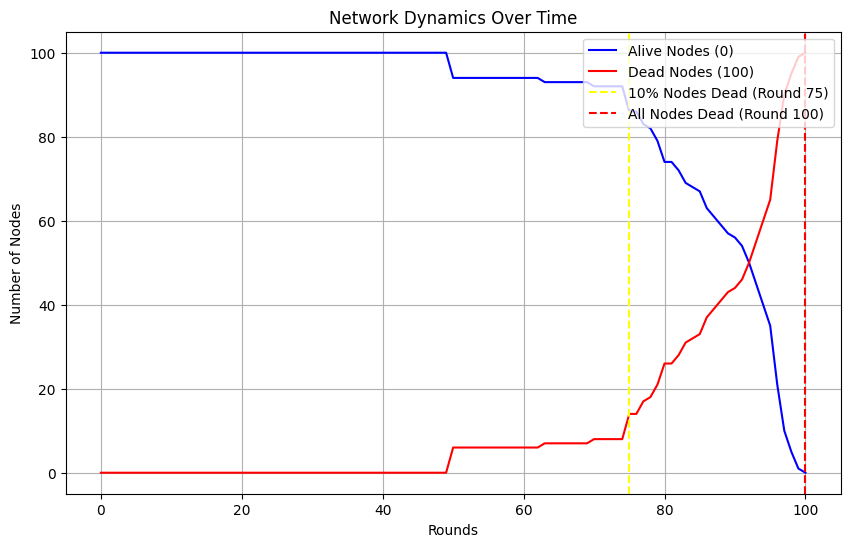

Network lifetime (10% nodes dead) is at round: 75
All nodes are dead at round: 100


In [ ]:
#7
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Parameters
xm, ym = 100, 100  # Field dimensions (meters)
n = int(input("Enter the number of nodes: "))  # Number of nodes (customizable)
Eo = 1000  # Initial energy (arbitrary units for easier visualization)
do = 20  # Optimal distance threshold
sink_x, sink_y = xm / 2, ym / 2  # Base station position
threshold_nodes_per_ch = 15  # Threshold for number of nodes per cluster head

# Deploy nodes
np.random.seed(42)
x_coords = np.random.uniform(0, xm, n)
y_coords = np.random.uniform(0, ym, n)
energies = np.full(n, Eo)  # Initial energy of nodes

# Visualization function
def plot_network(round_num, alive, dead, cluster_heads, cluster_centers, local_stations):
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords[alive], y_coords[alive], c='blue', label=f'Alive Nodes ({len(alive)})', alpha=0.6)
    plt.scatter(x_coords[dead], y_coords[dead], c='red', label=f'Dead Nodes ({len(dead)})', alpha=0.6)
    if cluster_heads:
        plt.scatter(x_coords[cluster_heads], y_coords[cluster_heads], c='green', s=100, label=f'Cluster Heads ({len(cluster_heads)})')
    if local_stations is not None:
        plt.scatter(local_stations[:, 0], local_stations[:, 1], c='purple', s=100, marker='X', label='Local Stations')
    plt.scatter(sink_x, sink_y, c='black', marker='x', s=100, label='Base Station')
    plt.title(f"WSN State at Round {round_num}")
    plt.xlabel("X (meters)")
    plt.ylabel("Y (meters)")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

# Helper function to determine the number of CHs for a cluster
def determine_num_ch(cluster_size):
    return max(1, cluster_size // threshold_nodes_per_ch)

# Main simulation loop
alive_nodes = []
dead_nodes = []
network_lifetime = -1  # Round when 10% nodes are dead
all_nodes_dead = -1  # Round when all nodes are dead
round_num = 0

while True:
    # Determine alive and dead nodes
    alive = np.where(energies > 0)[0]
    dead = np.where(energies <= 0)[0]
    alive_nodes.append(len(alive))
    dead_nodes.append(len(dead))

    # Check for network lifetime (10% nodes dead)
    if network_lifetime == -1 and len(dead) >= 0.1 * n:
        network_lifetime = round_num

    # Check for all nodes dead
    if all_nodes_dead == -1 and len(dead) == n:
        all_nodes_dead = round_num
        break  # End the simulation as all nodes are dead

    # Clustering using K-means
    alive_coords = np.column_stack((x_coords[alive], y_coords[alive]))
    num_clusters = max(1, len(alive) // threshold_nodes_per_ch)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(alive_coords)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    # Assign nodes to clusters
    clusters = {i: [] for i in range(num_clusters)}
    for idx, label in zip(alive, cluster_labels):
        clusters[label].append(idx)

    # Assign local stations at cluster centers
    local_stations = cluster_centers

    # Determine cluster heads for each cluster
    cluster_heads = []
    for cluster_id, nodes in clusters.items():
        num_ch = determine_num_ch(len(nodes))
        if len(nodes) <= num_ch:
            cluster_heads.extend(nodes)
        else:
            center_x, center_y = local_stations[cluster_id]
            distances = {node: np.sqrt((x_coords[node] - center_x) ** 2 + (y_coords[node] - center_y) ** 2) for node in nodes}
            sorted_by_distance = sorted(distances, key=distances.get)  # Sort nodes by distance
            cluster_heads.extend(sorted_by_distance[:num_ch])

    # Energy dissipation for nodes transmitting to cluster heads
    for cluster_id, nodes in clusters.items():
        current_ch = [ch for ch in cluster_heads if ch in nodes]
        for node in nodes:
            if node not in cluster_heads:
                closest_ch = min(current_ch, key=lambda ch: np.sqrt((x_coords[node] - x_coords[ch]) ** 2 + (y_coords[node] - y_coords[ch]) ** 2))
                distance_to_ch = np.sqrt((x_coords[node] - x_coords[closest_ch]) ** 2 + (y_coords[node] - y_coords[closest_ch]) ** 2)
                if distance_to_ch > do:
                    energies[node] -= 10 * (distance_to_ch / do)
                else:
                    energies[node] -= 10

    # Energy dissipation for cluster heads transmitting to local stations
    for cluster_id, chs in clusters.items():
        for ch in cluster_heads:
            if ch in chs:
                local_station_x, local_station_y = local_stations[cluster_id]
                distance_to_ls = np.sqrt((x_coords[ch] - local_station_x) ** 2 + (y_coords[ch] - local_station_y) ** 2)
                if distance_to_ls > do:
                    energies[ch] -= 20 * (distance_to_ls / do)
                else:
                    energies[ch] -= 20

    # Visualize network state at certain rounds
    if round_num % 10 == 0:
        plot_network(round_num, alive, dead, cluster_heads, cluster_centers, local_stations)

    round_num += 1  # Increment the round counter

# Plot network statistics
plt.figure(figsize=(10, 6))
plt.plot(range(len(alive_nodes)), alive_nodes, label=f"Alive Nodes ({alive_nodes[-1]})", color="blue")
plt.plot(range(len(dead_nodes)), dead_nodes, label=f"Dead Nodes ({dead_nodes[-1]})", color="red")

# Add vertical lines for milestones
if network_lifetime != -1:
    plt.axvline(x=network_lifetime, color='yellow', linestyle='--', label=f"10% Nodes Dead (Round {network_lifetime})")
if all_nodes_dead != -1:
    plt.axvline(x=all_nodes_dead, color='red', linestyle='--', label=f"All Nodes Dead (Round {all_nodes_dead})")

plt.title("Network Dynamics Over Time")
plt.xlabel("Rounds")
plt.ylabel("Number of Nodes")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# Print network milestones
if network_lifetime != -1:
    print(f"Network lifetime (10% nodes dead) is at round: {network_lifetime}")
print(f"All nodes are dead at round: {all_nodes_dead}")


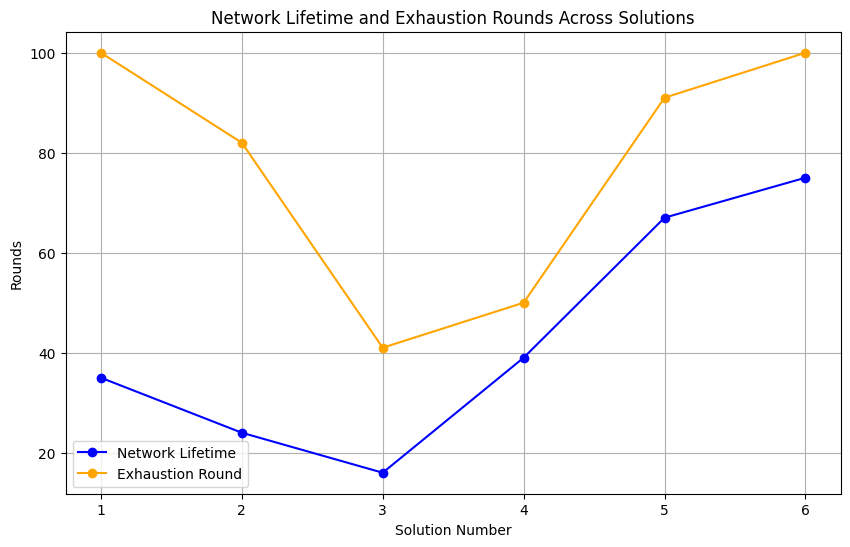

In [ ]:
import matplotlib.pyplot as plt

# Data for network lifetimes and exhaustion rounds
solutions = [1, 2, 3, 4, 5, 6]
network_lifetimes = [35, 24, 16, 39, 67, 75]
exhaustion_rounds = [100, 82, 41, 50, 91, 100]

# Combined plot
plt.figure(figsize=(10, 6))
plt.plot(solutions, network_lifetimes, marker='o', linestyle='-', label="Network Lifetime", color='blue')
plt.plot(solutions, exhaustion_rounds, marker='o', linestyle='-', label="Exhaustion Round", color='orange')
plt.title("Network Lifetime and Exhaustion Rounds Across Solutions")
plt.xlabel("Solution Number")
plt.ylabel("Rounds")
plt.xticks(solutions)
plt.grid(True)
plt.legend()
plt.show()


Enter the number of nodes: 100


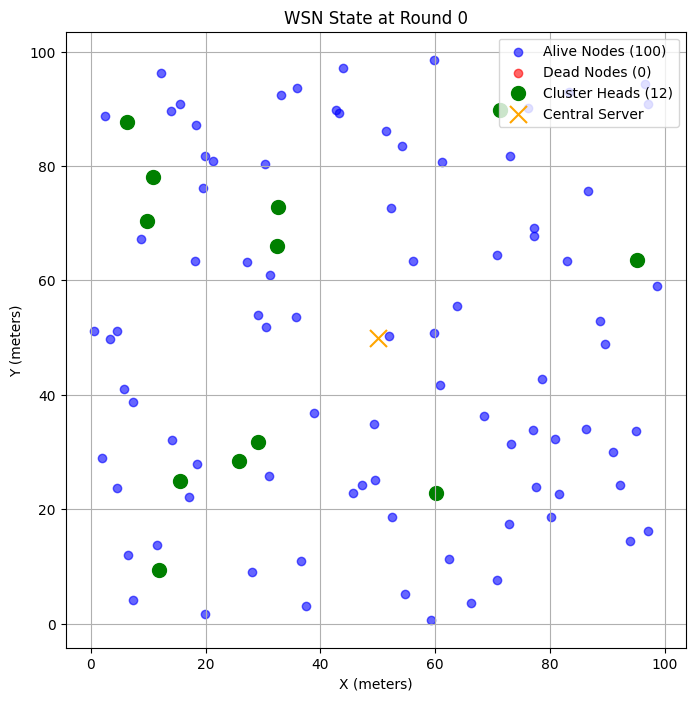

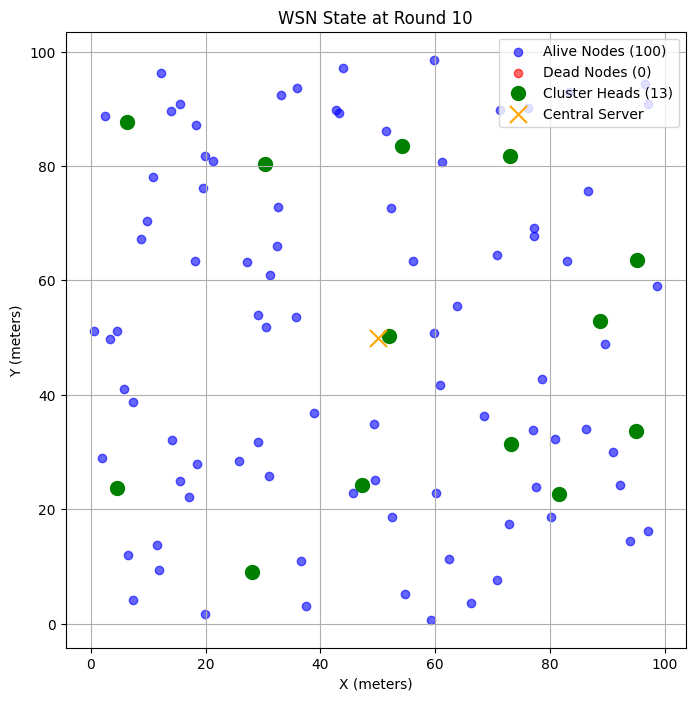

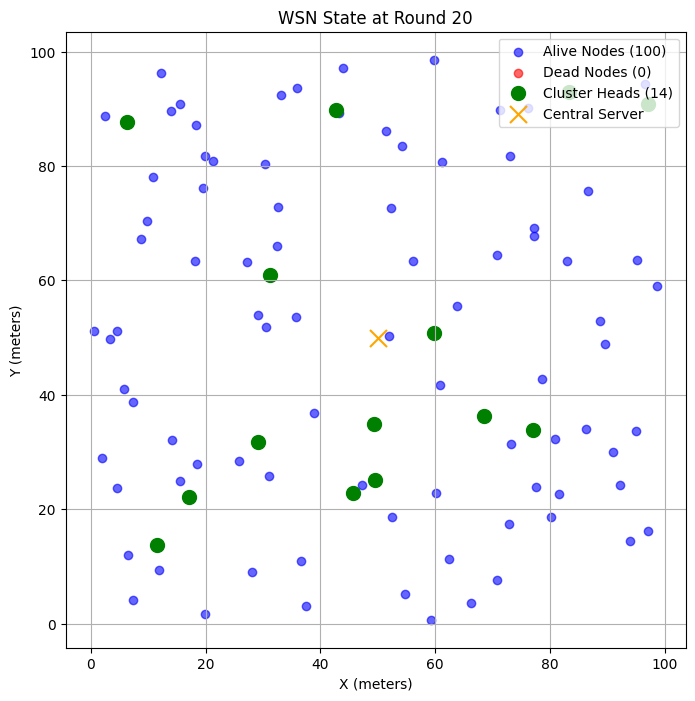

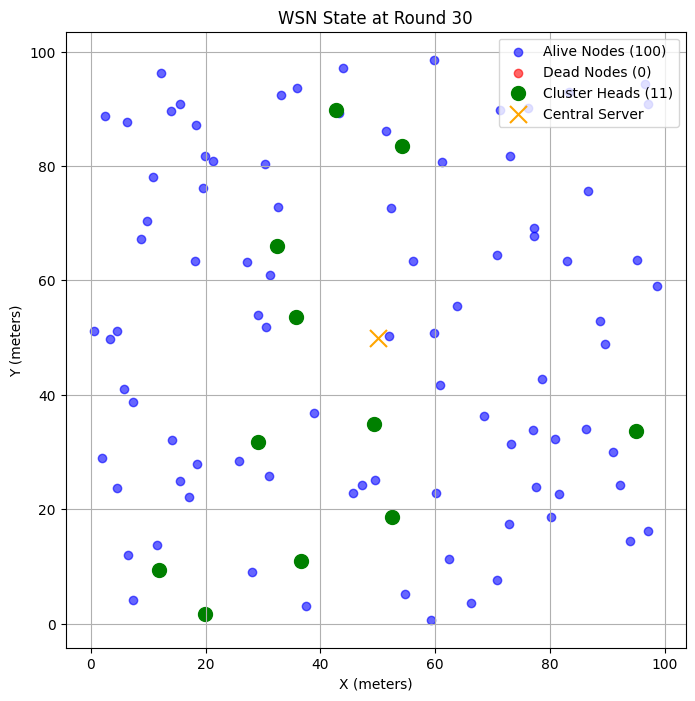

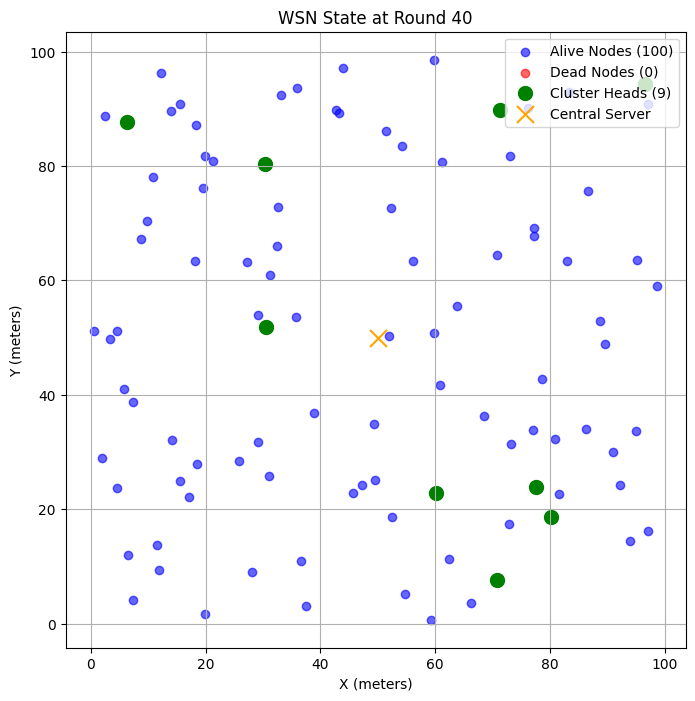

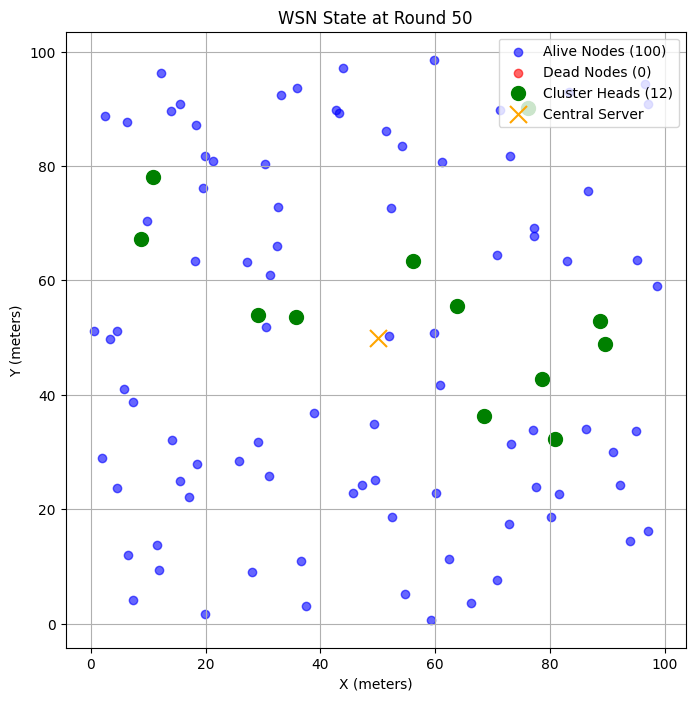

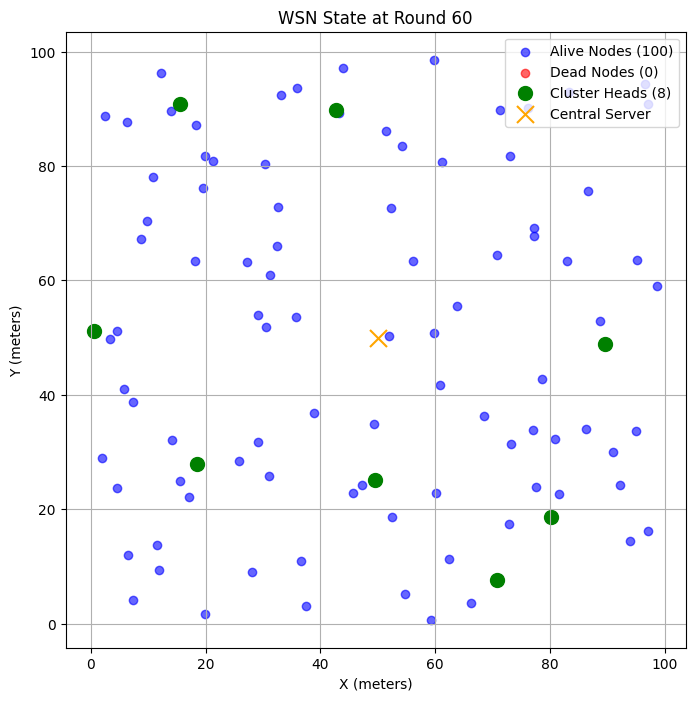

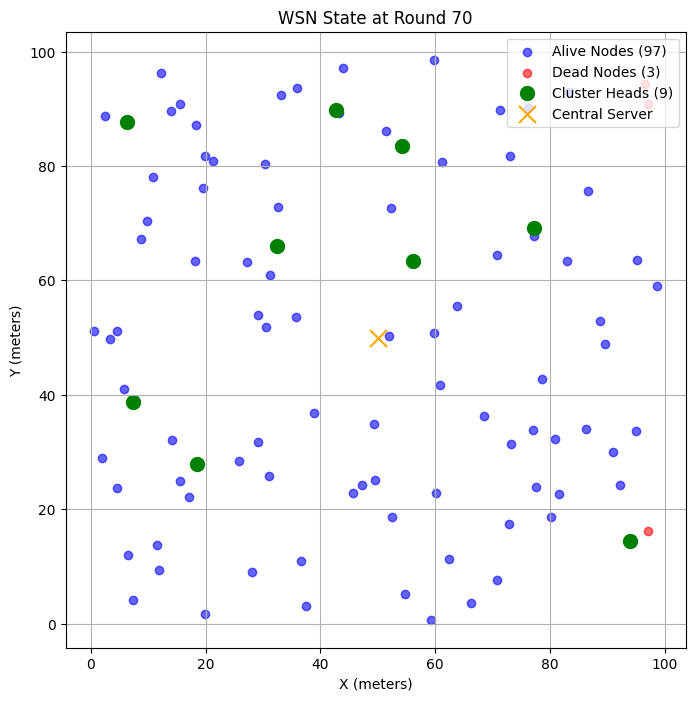

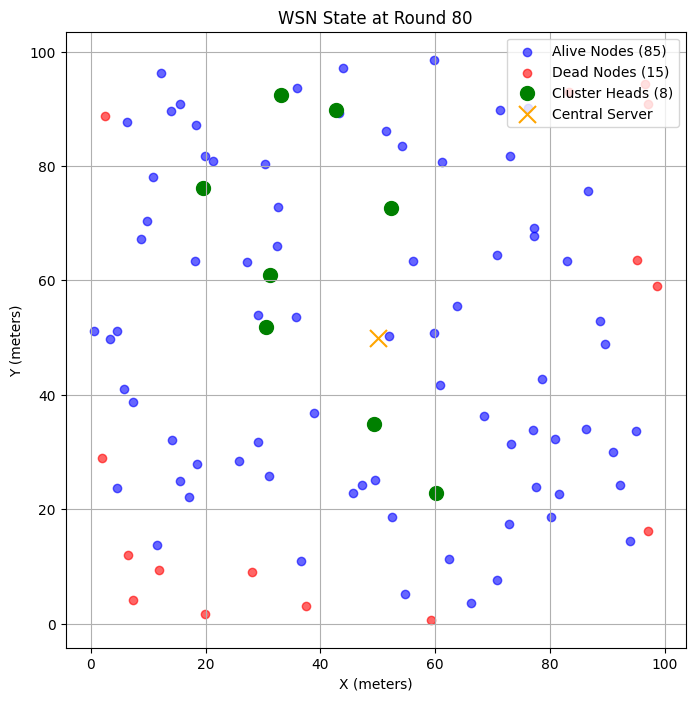

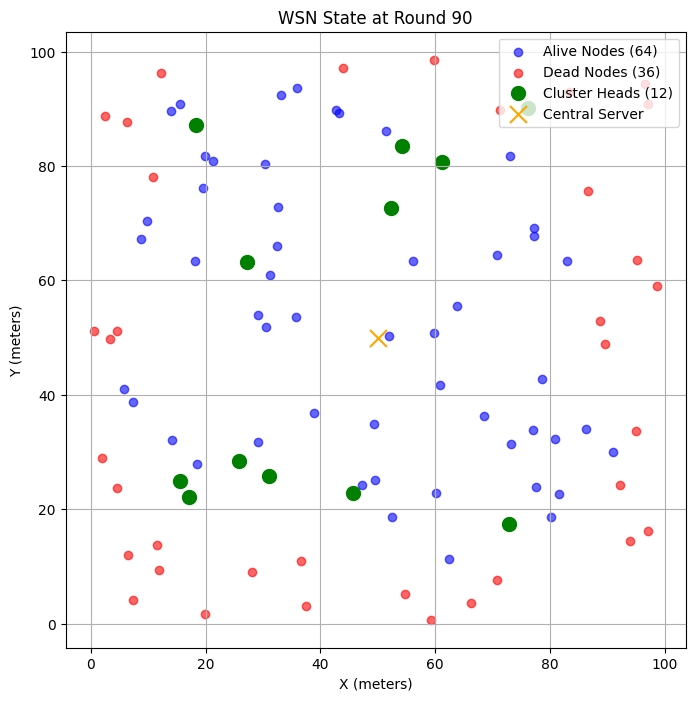

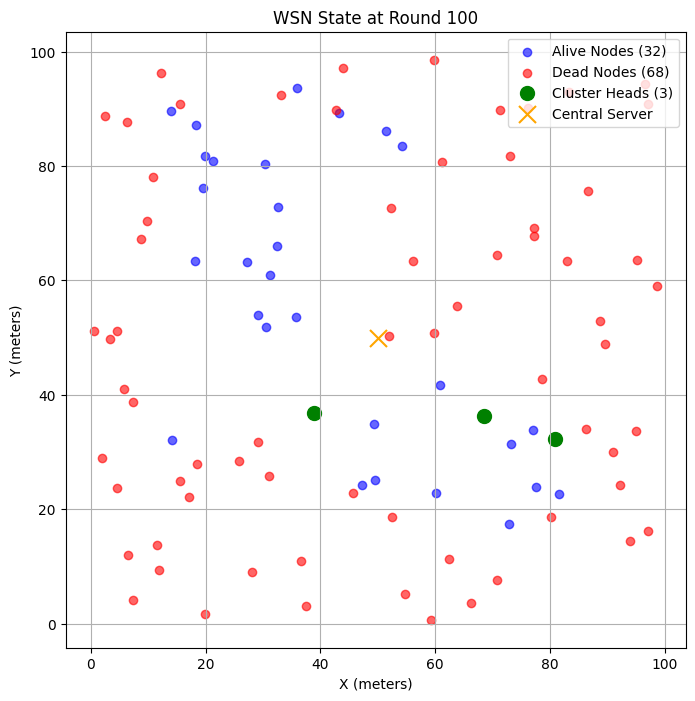

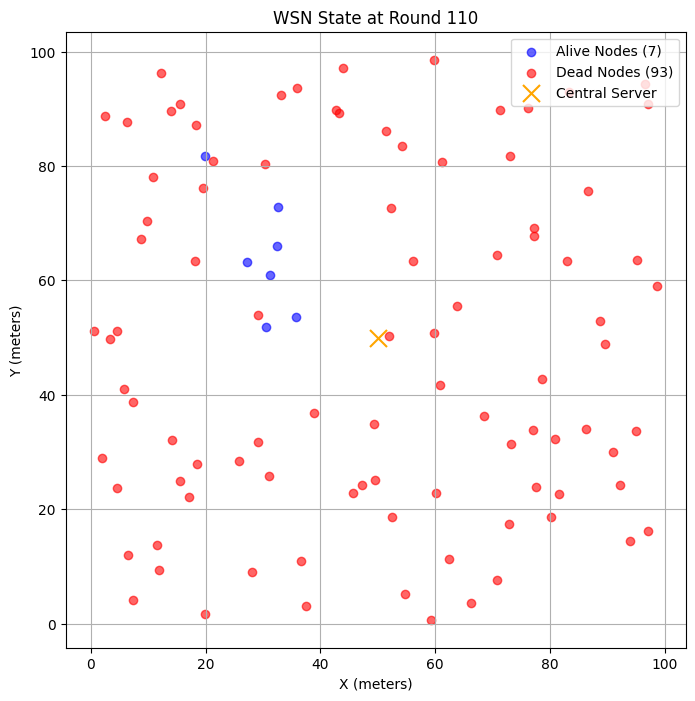

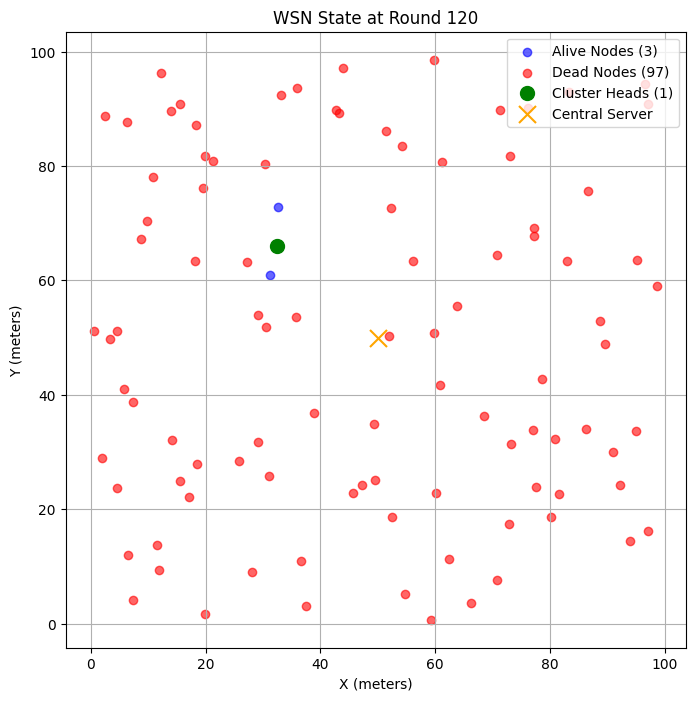

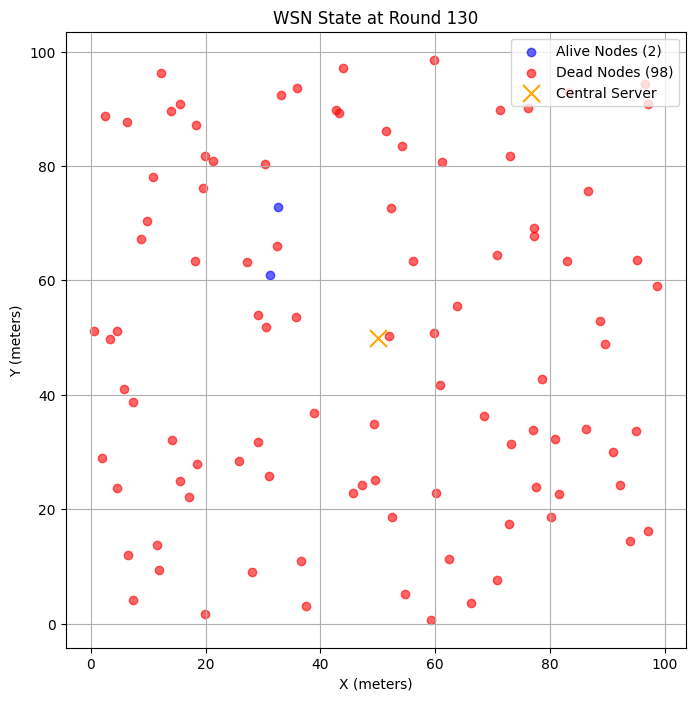

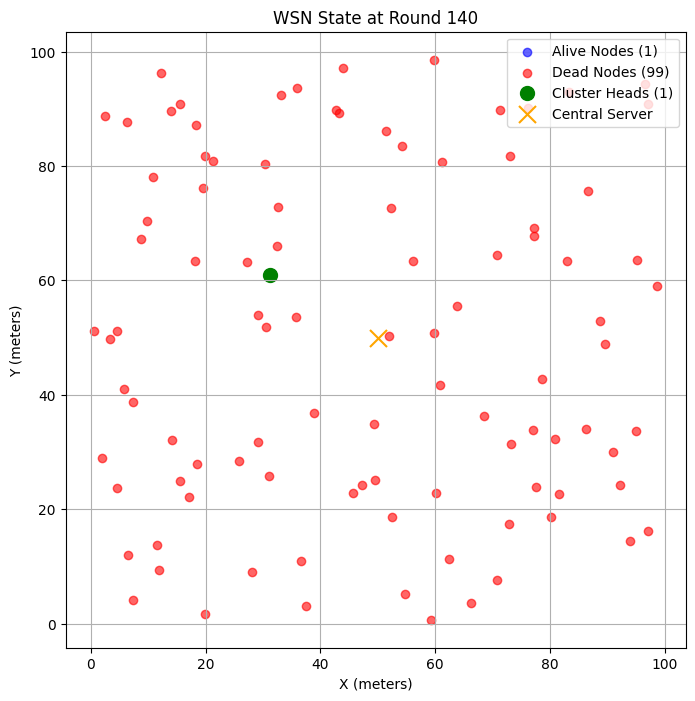

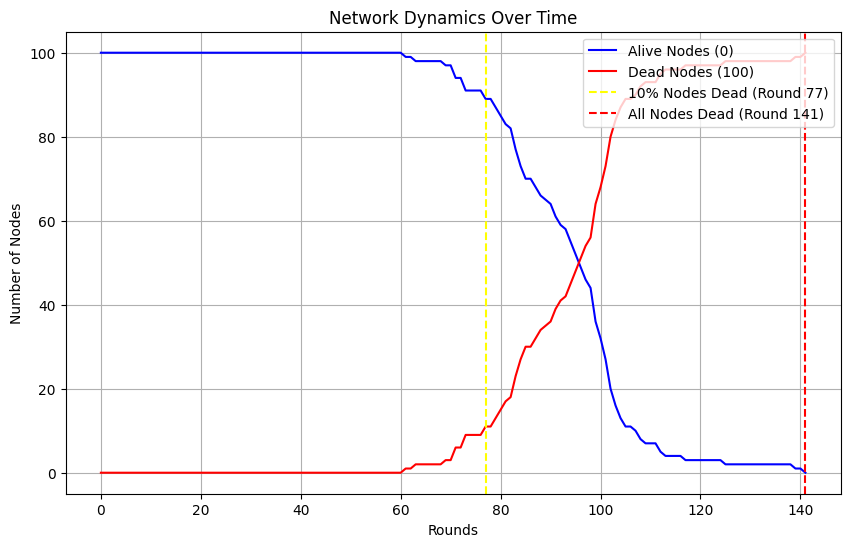

Network lifetime (10% nodes dead) is at round: 77
All nodes are dead at round: 141


In [ ]:
# #4
# import numpy as np
# import matplotlib.pyplot as plt

# # Parameters
# n = int(input("Enter the number of nodes: "))  # Number of nodes
# p = 0.1  # Probability of becoming a cluster head
# Eo = 1000  # Initial energy (arbitrary units for easier visualization)
# do = 20  # Optimal distance threshold
# field_size = n  # Field size is set to N x N where N = number of nodes
# central_server_x, central_server_y = field_size / 2, field_size / 2  # Central server position

# # Deploy nodes
# np.random.seed(42)
# x_coords = np.random.uniform(0, field_size, n)
# y_coords = np.random.uniform(0, field_size, n)
# energies = np.full(n, Eo)  # Initial energy of nodes

# # Visualization function
# def plot_network(round_num, alive, dead, cluster_heads):
#     plt.figure(figsize=(8, 8))
#     plt.scatter(x_coords[alive], y_coords[alive], c='blue', label=f'Alive Nodes ({len(alive)})', alpha=0.6)
#     plt.scatter(x_coords[dead], y_coords[dead], c='red', label=f'Dead Nodes ({len(dead)})', alpha=0.6)
#     if cluster_heads:
#         plt.scatter(x_coords[cluster_heads], y_coords[cluster_heads], c='green', s=100, label=f'Cluster Heads ({len(cluster_heads)})')
#     plt.scatter(central_server_x, central_server_y, c='orange', s=150, marker='x', label='Central Server')
#     plt.title(f"WSN State at Round {round_num}")
#     plt.xlabel("X (meters)")
#     plt.ylabel("Y (meters)")
#     plt.legend(loc="upper right")
#     plt.grid(True)
#     plt.show()

# # Main simulation loop
# alive_nodes = []
# dead_nodes = []
# network_lifetime = -1  # Round when 10% nodes are dead
# all_nodes_dead = -1  # Round when all nodes are dead
# round_num = 0

# while True:
#     # Determine alive and dead nodes
#     alive = np.where(energies > 0)[0]
#     dead = np.where(energies <= 0)[0]
#     alive_nodes.append(len(alive))
#     dead_nodes.append(len(dead))

#     # Check for network lifetime (10% nodes dead)
#     if network_lifetime == -1 and len(dead) >= 0.1 * n:
#         network_lifetime = round_num

#     # Check for all nodes dead
#     if all_nodes_dead == -1 and len(dead) == n:
#         all_nodes_dead = round_num
#         break  # End the simulation as all nodes are dead

#     # Cluster head election
#     cluster_heads = []
#     for i in alive:
#         if np.random.rand() <= p:
#             cluster_heads.append(i)

#     # Energy dissipation for normal nodes transmitting to their cluster head
#     if cluster_heads:  # Ensure there are cluster heads
#         for node in alive:
#             if node not in cluster_heads:
#                 closest_ch = min(cluster_heads, key=lambda ch: np.sqrt((x_coords[node] - x_coords[ch]) ** 2 + (y_coords[node] - y_coords[ch]) ** 2))
#                 distance_to_ch = np.sqrt((x_coords[node] - x_coords[closest_ch]) ** 2 + (y_coords[node] - y_coords[closest_ch]) ** 2)
#                 energies[node] -= 10 * (distance_to_ch / do)  # Decrease energy proportional to distance

#     # Energy dissipation for cluster heads transmitting to the central server
#     for ch in cluster_heads:
#         distance_to_cs = np.sqrt((x_coords[ch] - central_server_x) ** 2 + (y_coords[ch] - central_server_y) ** 2)
#         energies[ch] -= 10 * (distance_to_cs / do)  # Decrease energy proportional to distance

#     # Visualize network state at certain rounds
#     if round_num % 10 == 0:
#         plot_network(round_num, alive, dead, cluster_heads)

#     round_num += 1  # Increment the round counter

# # Plot network statistics
# plt.figure(figsize=(10, 6))
# plt.plot(range(len(alive_nodes)), alive_nodes, label=f"Alive Nodes ({alive_nodes[-1]})", color="blue")
# plt.plot(range(len(dead_nodes)), dead_nodes, label=f"Dead Nodes ({dead_nodes[-1]})", color="red")

# # Add vertical lines for milestones
# if network_lifetime != -1:
#     plt.axvline(x=network_lifetime, color='yellow', linestyle='--', label=f"10% Nodes Dead (Round {network_lifetime})")
# if all_nodes_dead != -1:
#     plt.axvline(x=all_nodes_dead, color='red', linestyle='--', label=f"All Nodes Dead (Round {all_nodes_dead})")

# plt.title("Network Dynamics Over Time")
# plt.xlabel("Rounds")
# plt.ylabel("Number of Nodes")
# plt.legend(loc="upper right")
# plt.grid(True)
# plt.show()

# # Print network milestones
# if network_lifetime != -1:
#     print(f"Network lifetime (10% nodes dead) is at round: {network_lifetime}")
# print(f"All nodes are dead at round: {all_nodes_dead}")
